In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data check

In [ ]:
a_purchase = pd.read_csv("A_purchase_final.csv")
b_purchase = pd.read_csv("B_purchase_final.csv")
a_sales = pd.read_csv("A_sales_final.csv")
b_sales = pd.read_csv("B_sales_final.csv")

In [ ]:
print(a_purchase.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28295 entries, 0 to 28294
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   일자                  28295 non-null  object 
 1   공급업체 코드             28295 non-null  int64  
 2   공급업체 우편번호           28295 non-null  int64  
 3   상품명                 28295 non-null  object 
 4   입수                  28295 non-null  int64  
 5   수량                  28295 non-null  int64  
 6   EA                  28295 non-null  int64  
 7   중분류                 28295 non-null  object 
 8   소분류                 28295 non-null  object 
 9   분류키                 28295 non-null  object 
 10  주소                  28295 non-null  object 
 11  온도                  28293 non-null  float64
 12  강수량                 10335 non-null  float64
 13  fulfillment_center  28295 non-null  int64  
 14  확진자 수               15082 non-null  float64
 15  주말                  28295 non-null  int64  
 16  공휴일 

In [ ]:
print(b_purchase.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4367 entries, 0 to 4366
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   일자                  4367 non-null   object 
 1   공급업체 코드             4367 non-null   int64  
 2   공급업체 우편번호           4367 non-null   int64  
 3   상품명                 4367 non-null   object 
 4   입수                  4367 non-null   int64  
 5   수량                  4367 non-null   int64  
 6   EA                  4367 non-null   int64  
 7   중분류                 4367 non-null   object 
 8   소분류                 4367 non-null   object 
 9   분류키                 4367 non-null   object 
 10  주소                  4367 non-null   object 
 11  온도                  4366 non-null   float64
 12  강수량                 1709 non-null   float64
 13  fulfillment_center  4367 non-null   int64  
 14  확진자 수               2579 non-null   float64
 15  주말                  4367 non-null   int64  
 16  공휴일   

In [ ]:
print(a_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229074 entries, 0 to 229073
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   일자                  229074 non-null  object 
 1   우편번호                229074 non-null  int64  
 2   매출처코드               229074 non-null  int64  
 3   판매수량                229074 non-null  int64  
 4   입수                  229074 non-null  int64  
 5   상품명                 229074 non-null  object 
 6   중분류                 229074 non-null  object 
 7   소분류                 229074 non-null  object 
 8   공급가액                229074 non-null  int64  
 9   부가세                 229074 non-null  int64  
 10  분류키                 229074 non-null  object 
 11  주소                  229074 non-null  object 
 12  온도                  229066 non-null  float64
 13  강수량                 80833 non-null   float64
 14  fulfillment_center  229074 non-null  int64  
 15  확진자 수               152205 non-nul

In [ ]:
print(b_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72789 entries, 0 to 72788
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   일자                  72789 non-null  object 
 1   우편번호                72789 non-null  int64  
 2   매출처코드               72789 non-null  int64  
 3   판매수량                72789 non-null  int64  
 4   입수                  72789 non-null  int64  
 5   상품명                 72789 non-null  object 
 6   중분류                 72789 non-null  object 
 7   소분류                 72789 non-null  object 
 8   공급가액                72789 non-null  int64  
 9   부가세                 72789 non-null  int64  
 10  분류키                 72789 non-null  object 
 11  주소                  72789 non-null  object 
 12  온도                  72784 non-null  float64
 13  강수량                 32096 non-null  float64
 14  fulfillment_center  72789 non-null  int64  
 15  확진자 수               39048 non-null  float64
 16  주말  

**handling missing data in the "temperature" column**

In [ ]:
def inspect_missing_temps(df, zipcode_col="우편번호", temp_col="온도", date_col="일자", context=5, fill_manual=False):
    """
    Shows rows where temperature is missing, with context ±N rows.
    If fill_manual=True, allows manual entry of values.
    """
    missing_idx = df[df[temp_col].isna()].index

    if len(missing_idx) == 0:
        print(f"✅ There is no missing values in the column '{temp_col}'")
        return df

    print(f"⚠️ Found {len(missing_idx)} missing values in the column '{temp_col}'\n")

    for idx in missing_idx:
        print("=" * 100)
        print(f"📅 {date_col}: {df.loc[idx, date_col]},  📮 {zipcode_col}: {df.loc[idx, zipcode_col]}")
        print(f"→ Row index: {idx}\n")

        start = max(0, idx - context)
        end = min(len(df), idx + context + 1)

        display_df = df.loc[start:end, [date_col, zipcode_col, temp_col]].copy()
        display_df["(missing?)"] = display_df[temp_col].isna()

        # table
        print(tabulate(display_df, headers="keys", tablefmt="fancy_grid", showindex=True))
        print()

        # manual
        if fill_manual:
            val = input(f"Input the value for the {temp_col} in the row {idx} (Enter to pass): ").strip()
            if val:
                try:
                    df.loc[idx, temp_col] = float(val)
                    print(f"✅ Value {val} filled.\n")
                except ValueError:
                    print("⚠️ Incorrect value, skipped.\n")

    return df

In [ ]:
# only inspection
# inspect_missing_temps(a_sales)

# filling (manually)
a_sales = inspect_missing_temps(a_sales, fill_manual=True)

⚠️ Found 8 missing values in the column '온도'

📅 일자: 2024-09-24,  📮 우편번호: 38178
→ Row index: 214309

╒════════╤════════════╤════════════╤════════╤══════════════╕
│        │ 일자       │   우편번호 │   온도 │ (missing?)   │
╞════════╪════════════╪════════════╪════════╪══════════════╡
│ 214304 │ 2024-09-24 │      37899 │   20.7 │ False        │
├────────┼────────────┼────────────┼────────┼──────────────┤
│ 214305 │ 2024-09-24 │      37899 │   20.7 │ False        │
├────────┼────────────┼────────────┼────────┼──────────────┤
│ 214306 │ 2024-09-24 │      37899 │   20.7 │ False        │
├────────┼────────────┼────────────┼────────┼──────────────┤
│ 214307 │ 2024-09-24 │      37899 │   20.7 │ False        │
├────────┼────────────┼────────────┼────────┼──────────────┤
│ 214308 │ 2024-09-24 │      37899 │   20.7 │ False        │
├────────┼────────────┼────────────┼────────┼──────────────┤
│ 214309 │ 2024-09-24 │      38178 │  nan   │ True         │
├────────┼────────────┼────────────┼────────┼─────────

In [ ]:
b_sales = inspect_missing_temps(b_sales, fill_manual=True)

⚠️ Found 5 missing values in the column '온도'

📅 일자: 2024-10-18,  📮 우편번호: 50875
→ Row index: 67771

╒═══════╤════════════╤════════════╤════════╤══════════════╕
│       │ 일자       │   우편번호 │   온도 │ (missing?)   │
╞═══════╪════════════╪════════════╪════════╪══════════════╡
│ 67766 │ 2024-10-18 │      52009 │   22.4 │ False        │
├───────┼────────────┼────────────┼────────┼──────────────┤
│ 67767 │ 2024-10-18 │      51357 │   22.4 │ False        │
├───────┼────────────┼────────────┼────────┼──────────────┤
│ 67768 │ 2024-10-18 │      51357 │   22.4 │ False        │
├───────┼────────────┼────────────┼────────┼──────────────┤
│ 67769 │ 2024-10-18 │      51145 │   22.4 │ False        │
├───────┼────────────┼────────────┼────────┼──────────────┤
│ 67770 │ 2024-10-18 │      51402 │   22.4 │ False        │
├───────┼────────────┼────────────┼────────┼──────────────┤
│ 67771 │ 2024-10-18 │      50875 │  nan   │ True         │
├───────┼────────────┼────────────┼────────┼──────────────┤
│ 67772 │

In [ ]:
a_purchase = a_purchase.drop(["공급업체 우편번호", "입수", "EA", "중분류",
                              "소분류", "분류키", "주소", "fulfillment_center",
                              "온도", "강수량"], axis=1)
a_sales = a_sales.drop(["우편번호", "입수", "중분류", "부가세", "공급가액",
                              "소분류", "분류키", "주소", "fulfillment_center"], axis=1)
b_purchase = b_purchase.drop(["공급업체 우편번호", "입수", "EA", "중분류",
                              "소분류", "분류키", "주소", "fulfillment_center",
                              "온도", "강수량"], axis=1)
b_sales = b_sales.drop(["우편번호", "입수", "중분류", "부가세", "공급가액",
                              "소분류", "분류키", "주소", "fulfillment_center"], axis=1)

In [ ]:
print(a_purchase.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28295 entries, 0 to 28294
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일자       28295 non-null  object 
 1   공급업체 코드  28295 non-null  int64  
 2   상품명      28295 non-null  object 
 3   수량       28295 non-null  int64  
 4   확진자 수    15082 non-null  float64
 5   주말       28295 non-null  int64  
 6   공휴일      28295 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.5+ MB
None


In [ ]:
print(b_purchase.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4367 entries, 0 to 4366
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일자       4367 non-null   object 
 1   공급업체 코드  4367 non-null   int64  
 2   상품명      4367 non-null   object 
 3   수량       4367 non-null   int64  
 4   확진자 수    2579 non-null   float64
 5   주말       4367 non-null   int64  
 6   공휴일      4367 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 238.9+ KB
None


In [ ]:
print(a_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229074 entries, 0 to 229073
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일자      229074 non-null  object 
 1   매출처코드   229074 non-null  int64  
 2   판매수량    229074 non-null  int64  
 3   상품명     229074 non-null  object 
 4   온도      229074 non-null  float64
 5   강수량     80833 non-null   float64
 6   확진자 수   152205 non-null  float64
 7   주말      229074 non-null  int64  
 8   공휴일     229074 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 15.7+ MB
None


In [ ]:
print(b_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72789 entries, 0 to 72788
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      72789 non-null  object 
 1   매출처코드   72789 non-null  int64  
 2   판매수량    72789 non-null  int64  
 3   상품명     72789 non-null  object 
 4   온도      72789 non-null  float64
 5   강수량     32096 non-null  float64
 6   확진자 수   39048 non-null  float64
 7   주말      72789 non-null  int64  
 8   공휴일     72789 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 5.0+ MB
None


In [ ]:
print(a_purchase.head(10))

           일자  공급업체 코드                     상품명  수량  확진자 수  주말  공휴일
0  2021-01-05     1019    데미소다 애플<340ml*20>XXX   5  715.0   0    0
1  2021-01-05     1019   오츠카]데미소다<오렌지/250ml/캔>  10  715.0   0    0
2  2021-01-05     1019   오츠카]데미소다<청포도/250ml/캔>  10  715.0   0    0
3  2021-01-05     1019        오츠카]오란씨<파인/1.5L>  20  715.0   0    0
4  2021-01-05     1019               오츠카]오로나민씨  20  715.0   0    0
5  2021-01-05     1019           오츠카]포카리<1.5L>  44  715.0   0    0
6  2021-01-05     1019          오츠카]포카리<500ml>  55  715.0   0    0
7  2021-01-05     1019        오츠카]오란씨<파인/1.5L>  10  715.0   0    0
8  2021-01-05     1027           칠성]게토레이<1.5L>  10  715.0   0    0
9  2021-01-05     1027  델몬트 팩망고번들<190ml*24>XXX  10  715.0   0    0


**강수량 결측치 처리**

In [ ]:
a_purchase["확진자 수"] = a_purchase["확진자 수"].fillna(0)
b_purchase["확진자 수"] = b_purchase["확진자 수"].fillna(0)
a_sales[["강수량", "확진자 수"]] = a_sales[["강수량", "확진자 수"]].fillna(0)
b_sales[["강수량", "확진자 수"]] = b_sales[["강수량", "확진자 수"]].fillna(0)

In [ ]:
print(a_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229074 entries, 0 to 229073
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일자      229074 non-null  object 
 1   매출처코드   229074 non-null  int64  
 2   판매수량    229074 non-null  int64  
 3   상품명     229074 non-null  object 
 4   온도      229074 non-null  float64
 5   강수량     229074 non-null  float64
 6   확진자 수   229074 non-null  float64
 7   주말      229074 non-null  int64  
 8   공휴일     229074 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 15.7+ MB
None


In [ ]:
print(b_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72789 entries, 0 to 72788
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      72789 non-null  object 
 1   매출처코드   72789 non-null  int64  
 2   판매수량    72789 non-null  int64  
 3   상품명     72789 non-null  object 
 4   온도      72789 non-null  float64
 5   강수량     72789 non-null  float64
 6   확진자 수   72789 non-null  float64
 7   주말      72789 non-null  int64  
 8   공휴일     72789 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 5.0+ MB
None


data colulmns information (EDA)

In [ ]:
# 주말 데이터
weekends_list = a_purchase['주말'].unique().tolist()
print(f'Weekend information representation: ', weekends_list)

# 공휴일 데이터
holidays_list = a_purchase['공휴일'].unique().tolist()
print(f'Holiday information representation: ', holidays_list)

Weekend information representation:  [0, 1]
Holiday information representation:  [0, 1]


In [ ]:
# let's see what kind of holidays do we have
holiday_dates = pd.concat([
    a_purchase.loc[a_purchase['공휴일'] == 1, ['일자']],
    b_purchase.loc[b_purchase['공휴일'] == 1, ['일자']],
    a_sales.loc[a_sales['공휴일'] == 1, ['일자']],
    b_sales.loc[b_sales['공휴일'] == 1, ['일자']]
])

# delete duplicates and sort
holiday_dates = holiday_dates.drop_duplicates().sort_values('일자').reset_index(drop=True)

print(holiday_dates)

            일자
0   2021-02-11
1   2021-03-01
2   2021-05-05
3   2021-05-19
4   2021-08-16
5   2021-09-20
6   2021-10-04
7   2021-10-11
8   2021-12-25
9   2022-01-31
10  2022-03-09
11  2022-06-06
12  2022-09-09
13  2023-01-21
14  2023-05-05
15  2023-05-27
16  2023-05-29
17  2023-06-06
18  2023-09-28
19  2023-10-02
20  2024-02-09
21  2024-03-01
22  2024-04-10
23  2024-05-06
24  2024-05-15
25  2024-06-06
26  2024-08-15
27  2024-10-01
28  2024-10-03
29  2024-10-09
30  2024-12-25


'추석' and '설날' defined as only 1-day holiday, but we need to add all non-working days.

However, there is an issue that we don't have dates that we need --> we need to save holidays reference data and use them later (after data aggregation to the week-scale data)

In [ ]:
# Step 1: Extract existing holidays from all datasets
existing_holidays = pd.concat([
    a_purchase.loc[a_purchase['공휴일'] == 1, ['일자']],
    b_purchase.loc[b_purchase['공휴일'] == 1, ['일자']],
    a_sales.loc[a_sales['공휴일'] == 1, ['일자']],
    b_sales.loc[b_sales['공휴일'] == 1, ['일자']]
])

# Remove duplicates and ensure datetime type
existing_holidays = existing_holidays.drop_duplicates()
existing_holidays['일자'] = pd.to_datetime(existing_holidays['일자'])

print(f"Existing holidays found in datasets: {len(existing_holidays)}")

# Step 2: Create dates from the new holiday ranges
holiday_ranges = [
    ('2021-02-11', '2021-02-13'),
    ('2021-09-20', '2021-09-22'),
    ('2022-01-31', '2022-02-02'),
    ('2022-09-09', '2022-09-12'),
    ('2023-01-21', '2023-01-24'),
    ('2023-09-29', '2023-10-03'),
    ('2024-02-09', '2024-02-12'),
    ('2024-09-16', '2024-09-18')
]

# Generate all dates from the ranges
new_holiday_dates = []
for start_date, end_date in holiday_ranges:
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    new_holiday_dates.extend(date_range)

new_holidays = pd.DataFrame({'일자': new_holiday_dates})
# Ensure datetime type
new_holidays['일자'] = pd.to_datetime(new_holidays['일자'])

print(f"New holiday dates to add: {len(new_holidays)}")

# Step 3: Combine existing and new holidays
holiday_reference = pd.concat([existing_holidays, new_holidays], ignore_index=True)

# Remove duplicates and sort
holiday_reference = holiday_reference.drop_duplicates().sort_values('일자').reset_index(drop=True)

# Add the holiday flag column
holiday_reference['공휴일'] = 1

print(f"\nTotal unique holidays in reference table: {len(holiday_reference)}")
print("\nHoliday Reference Table:")
print(holiday_reference.head(20))
print("...")
print(holiday_reference.tail(20))

# Show breakdown by year for verification
print("\nHolidays by year:")
holiday_reference['year'] = holiday_reference['일자'].dt.year
print(holiday_reference.groupby('year').size())

Existing holidays found in datasets: 31
New holiday dates to add: 29

Total unique holidays in reference table: 53

Holiday Reference Table:
           일자  공휴일
0  2021-02-11    1
1  2021-02-12    1
2  2021-02-13    1
3  2021-03-01    1
4  2021-05-05    1
5  2021-05-19    1
6  2021-08-16    1
7  2021-09-20    1
8  2021-09-21    1
9  2021-09-22    1
10 2021-10-04    1
11 2021-10-11    1
12 2021-12-25    1
13 2022-01-31    1
14 2022-02-01    1
15 2022-02-02    1
16 2022-03-09    1
17 2022-06-06    1
18 2022-09-09    1
19 2022-09-10    1
...
           일자  공휴일
33 2023-10-01    1
34 2023-10-02    1
35 2023-10-03    1
36 2024-02-09    1
37 2024-02-10    1
38 2024-02-11    1
39 2024-02-12    1
40 2024-03-01    1
41 2024-04-10    1
42 2024-05-06    1
43 2024-05-15    1
44 2024-06-06    1
45 2024-08-15    1
46 2024-09-16    1
47 2024-09-17    1
48 2024-09-18    1
49 2024-10-01    1
50 2024-10-03    1
51 2024-10-09    1
52 2024-12-25    1

Holidays by year:
year
2021    13
2022     9
2023    14


since I was planning to aggregate data by weeks --> we don't need the info about weekends

In [ ]:
a_purchase = a_purchase.drop('주말', axis=1)
b_purchase = b_purchase.drop('주말', axis=1)
a_sales = a_sales.drop('주말', axis=1)
b_sales = b_sales.drop('주말', axis=1)

In [ ]:
print(a_purchase.info())
print(a_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28295 entries, 0 to 28294
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일자       28295 non-null  object 
 1   공급업체 코드  28295 non-null  int64  
 2   상품명      28295 non-null  object 
 3   수량       28295 non-null  int64  
 4   확진자 수    28295 non-null  float64
 5   공휴일      28295 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229074 entries, 0 to 229073
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일자      229074 non-null  object 
 1   매출처코드   229074 non-null  int64  
 2   판매수량    229074 non-null  int64  
 3   상품명     229074 non-null  object 
 4   온도      229074 non-null  float64
 5   강수량     229074 non-null  float64
 6   확진자 수   229074 non-null  float64
 7   공휴일     229074 non-null  int64  
dtypes: float64(3), int64(3), o

let's see how many daily data are missing (important for the weekly aggregation)

In [ ]:
def print_missing(df, name, date_col="일자"):
    s = pd.to_datetime(df[date_col], errors="coerce").dt.normalize()
    s_ok = s.dropna()
    dmin, dmax = s_ok.min(), s_ok.max()
    full = pd.date_range(dmin, dmax, freq="D")
    missing = sorted(set(full) - set(pd.DatetimeIndex(s_ok.unique())))
    print(f"=== {name} ===")
    print(f"Range: {dmin.date()} — {dmax.date()}")
    print(f"Missing date: {len(missing)}")
    # for d in missing:
    #     print(d.strftime("%Y-%m-%d"))
    # print()

print_missing(a_purchase, "a_purchase")
print_missing(b_purchase, "b_purchase")
print_missing(a_sales,    "a_sales")
print_missing(b_sales,    "b_sales")

=== a_purchase ===
Range: 2021-01-05 — 2024-12-31
Missing date: 496
=== b_purchase ===
Range: 2021-01-05 — 2024-12-31
Missing date: 424
=== a_sales ===
Range: 2021-01-04 — 2024-12-31
Missing date: 676
=== b_sales ===
Range: 2021-01-31 — 2024-12-31
Missing date: 1008


**after compliting the simple prediction model, we better analyse more daily data**

In [ ]:
# code for the analysis

# Data aggregation

In [ ]:
import pandas as pd

# ============================================================================
# PART 1: AGGREGATION TO WEEKLY DATA
# ============================================================================

# Step 1: Prepare the holiday reference for merging
holiday_reference_copy = holiday_reference.copy()
holiday_reference_copy['week'] = holiday_reference_copy['일자'].dt.to_period('W')

# Count UNIQUE holiday DATES per week (not sum of flags)
holidays_per_week = holiday_reference_copy.groupby('week')['일자'].count().reset_index()
holidays_per_week.columns = ['week', '공휴일']

print("Holiday counts per week:")
print(holidays_per_week)

# Step 2: Function to aggregate purchase data
def aggregate_purchase_weekly(df, df_name):
    """Aggregate purchase data to weekly scale"""

    # Convert date to datetime
    df = df.copy()
    df['일자'] = pd.to_datetime(df['일자'])

    # Check date range
    print(f"\n{df_name} Date Range:")
    print(f"  Start: {df['일자'].min()}")
    print(f"  End: {df['일자'].max()}")
    print(f"  Unique dates: {df['일자'].nunique()}")

    # Create week identifier (week starting on Monday)
    df['week'] = df['일자'].dt.to_period('W')

    # Aggregate by week
    weekly_data = df.groupby('week').agg({
        '공급업체 코드': lambda x: list(x.unique()),
        '수량': 'sum',
        '확진자 수': 'mean',
    }).reset_index()

    # Merge with holiday reference to get holiday count
    weekly_data = weekly_data.merge(holidays_per_week, on='week', how='left')

    # Fill missing holidays with 0
    weekly_data['공휴일'] = weekly_data['공휴일'].fillna(0).astype(int)

    # Convert week period to start date for easier interpretation
    weekly_data['week_start'] = weekly_data['week'].dt.start_time

    # Round confirmed cases to 2 decimal places
    weekly_data['확진자 수'] = weekly_data['확진자 수'].round(2)

    # Reorder columns
    weekly_data = weekly_data[['week', 'week_start', '공급업체 코드', '수량', '확진자 수', '공휴일']]

    print(f"\n{df_name} - Weekly Aggregation Complete")
    print(f"  Original daily records: {len(df)}")
    print(f"  Aggregated weekly records: {len(weekly_data)}")
    print(f"  Week range: {weekly_data['week_start'].min()} to {weekly_data['week_start'].max()}")

    return weekly_data

# Step 3: Function to aggregate sales data
def aggregate_sales_weekly(df, df_name):
    """Aggregate sales data to weekly scale"""

    # Convert date to datetime
    df = df.copy()
    df['일자'] = pd.to_datetime(df['일자'])

    # Check date range
    print(f"\n{df_name} Date Range:")
    print(f"  Start: {df['일자'].min()}")
    print(f"  End: {df['일자'].max()}")
    print(f"  Unique dates: {df['일자'].nunique()}")

    # Create week identifier (week starting on Monday)
    df['week'] = df['일자'].dt.to_period('W')

    # Aggregate by week
    weekly_data = df.groupby('week').agg({
        '매출처코드': lambda x: list(x.unique()),
        '판매수량': 'sum',
        '온도': 'mean',
        '강수량': 'mean',
        '확진자 수': 'mean',
    }).reset_index()

    # Merge with holiday reference to get holiday count
    weekly_data = weekly_data.merge(holidays_per_week, on='week', how='left')

    # Fill missing holidays with 0
    weekly_data['공휴일'] = weekly_data['공휴일'].fillna(0).astype(int)

    # Convert week period to start date for easier interpretation
    weekly_data['week_start'] = weekly_data['week'].dt.start_time

    # Round numeric columns to 2 decimal places
    weekly_data['온도'] = weekly_data['온도'].round(2)
    weekly_data['강수량'] = weekly_data['강수량'].round(2)
    weekly_data['확진자 수'] = weekly_data['확진자 수'].round(2)

    # Reorder columns
    weekly_data = weekly_data[['week', 'week_start', '매출처코드', '판매수량', '온도', '강수량', '확진자 수', '공휴일']]

    print(f"\n{df_name} - Weekly Aggregation Complete")
    print(f"  Original daily records: {len(df)}")
    print(f"  Aggregated weekly records: {len(weekly_data)}")
    print(f"  Week range: {weekly_data['week_start'].min()} to {weekly_data['week_start'].max()}")

    return weekly_data

# Step 4: Apply aggregation to all datasets
print("="*60)
print("Starting Weekly Aggregation...")
print("="*60)

a_purchase_weekly = aggregate_purchase_weekly(a_purchase, "A Purchase")
b_purchase_weekly = aggregate_purchase_weekly(b_purchase, "B Purchase")
a_sales_weekly = aggregate_sales_weekly(a_sales, "A Sales")
b_sales_weekly = aggregate_sales_weekly(b_sales, "B Sales")

# ============================================================================
# PART 2: FILL MISSING WEEKS
# ============================================================================

# Step 1: Create a complete week range covering all datasets
def get_complete_week_range(dataframes_dict):
    """Get the complete week range across all datasets"""

    all_weeks = []
    for name, df in dataframes_dict.items():
        all_weeks.extend(df['week'].unique())

    # Find min and max weeks
    all_weeks = pd.Series(all_weeks).unique()
    min_week = min(all_weeks)
    max_week = max(all_weeks)

    # Create complete week range
    complete_weeks = pd.period_range(start=min_week, end=max_week, freq='W')

    print(f"Complete week range: {min_week} to {max_week}")
    print(f"Total weeks: {len(complete_weeks)}")

    return complete_weeks

# Step 2: Fill missing weeks for purchase data
def fill_missing_weeks_purchase_fixed(df, complete_weeks, df_name):
    """Fill missing weeks in purchase data - FIXED VERSION"""

    # Create dataframe with all weeks
    complete_df = pd.DataFrame({'week': complete_weeks})
    complete_df['week_start'] = complete_df['week'].dt.start_time

    # Merge with existing data
    filled_df = complete_df.merge(df, on='week', how='left')

    # Handle the week_start column
    filled_df['week_start'] = filled_df['week_start_x'].fillna(filled_df['week_start_y'])
    filled_df = filled_df.drop(['week_start_x', 'week_start_y'], axis=1)

    filled_df['수량'] = filled_df['수량'].fillna(0).astype(int)

    filled_df['공급업체 코드'] = filled_df['공급업체 코드'].apply(
        lambda x: x if isinstance(x, list) else []
    )

    # FIX: Use both forward and backward fill
    filled_df['확진자 수'] = filled_df['확진자 수'].fillna(method='ffill').fillna(method='bfill')

    filled_df['공휴일'] = filled_df['공휴일'].fillna(0).astype(int)

    # Reorder columns
    filled_df = filled_df[['week', 'week_start', '공급업체 코드', '수량', '확진자 수', '공휴일']]

    missing_weeks = len(complete_weeks) - len(df)
    print(f"\n{df_name}:")
    print(f"  Original weeks: {len(df)}")
    print(f"  Filled weeks: {len(filled_df)}")
    print(f"  Added {missing_weeks} missing weeks")

    return filled_df

# Step 3: Fill missing weeks for sales data
def fill_missing_weeks_sales_fixed(df, complete_weeks, df_name):
    """Fill missing weeks in sales data - FIXED VERSION"""

    # Create dataframe with all weeks
    complete_df = pd.DataFrame({'week': complete_weeks})
    complete_df['week_start'] = complete_df['week'].dt.start_time

    # Merge with existing data
    filled_df = complete_df.merge(df, on='week', how='left')

    # Handle the week_start column
    filled_df['week_start'] = filled_df['week_start_x'].fillna(filled_df['week_start_y'])
    filled_df = filled_df.drop(['week_start_x', 'week_start_y'], axis=1)

    # Fill missing values appropriately:
    filled_df['판매수량'] = filled_df['판매수량'].fillna(0).astype(int)

    filled_df['매출처코드'] = filled_df['매출처코드'].apply(
        lambda x: x if isinstance(x, list) else []
    )

    # FIX: Use both forward and backward fill for temperature
    filled_df['온도'] = filled_df['온도'].fillna(method='ffill').fillna(method='bfill')

    filled_df['강수량'] = filled_df['강수량'].fillna(0)

    # FIX: Use both forward and backward fill for confirmed cases
    filled_df['확진자 수'] = filled_df['확진자 수'].fillna(method='ffill').fillna(method='bfill')

    filled_df['공휴일'] = filled_df['공휴일'].fillna(0).astype(int)

    # Reorder columns
    filled_df = filled_df[['week', 'week_start', '매출처코드', '판매수량', '온도', '강수량', '확진자 수', '공휴일']]

    missing_weeks = len(complete_weeks) - len(df)
    print(f"\n{df_name}:")
    print(f"  Original weeks: {len(df)}")
    print(f"  Filled weeks: {len(filled_df)}")
    print(f"  Added {missing_weeks} missing weeks")

    return filled_df

# Step 4: Get complete week range and fill missing weeks
print("\n" + "="*60)
print("Filling Missing Weeks...")
print("="*60)

# THIS WAS MISSING - Create the complete_weeks variable!
datasets_dict = {
    'A Purchase': a_purchase_weekly,
    'B Purchase': b_purchase_weekly,
    'A Sales': a_sales_weekly,
    'B Sales': b_sales_weekly
}
complete_weeks = get_complete_week_range(datasets_dict)

# Now fill the missing weeks
a_purchase_complete = fill_missing_weeks_purchase_fixed(a_purchase_weekly, complete_weeks, "A Purchase")
b_purchase_complete = fill_missing_weeks_purchase_fixed(b_purchase_weekly, complete_weeks, "B Purchase")
a_sales_complete = fill_missing_weeks_sales_fixed(a_sales_weekly, complete_weeks, "A Sales")
b_sales_complete = fill_missing_weeks_sales_fixed(b_sales_weekly, complete_weeks, "B Sales")

# Step 5: Verify no missing values
print("\n" + "="*60)
print("Verification - Missing Values Check:")
print("="*60)
print(f"A Purchase - 확진자 수 missing: {a_purchase_complete['확진자 수'].isnull().sum()}")
print(f"B Purchase - 확진자 수 missing: {b_purchase_complete['확진자 수'].isnull().sum()}")
print(f"A Sales - 확진자 수 missing: {a_sales_complete['확진자 수'].isnull().sum()}")
print(f"B Sales - 확진자 수 missing: {b_sales_complete['확진자 수'].isnull().sum()}")

print("\nAll datasets now have complete weekly data!")
print(f"Total weeks in each dataset: {len(complete_weeks)}")

Holiday counts per week:
                     week  공휴일
0   2021-02-08/2021-02-14    3
1   2021-03-01/2021-03-07    1
2   2021-05-03/2021-05-09    1
3   2021-05-17/2021-05-23    1
4   2021-08-16/2021-08-22    1
5   2021-09-20/2021-09-26    3
6   2021-10-04/2021-10-10    1
7   2021-10-11/2021-10-17    1
8   2021-12-20/2021-12-26    1
9   2022-01-31/2022-02-06    3
10  2022-03-07/2022-03-13    1
11  2022-06-06/2022-06-12    1
12  2022-09-05/2022-09-11    3
13  2022-09-12/2022-09-18    1
14  2023-01-16/2023-01-22    2
15  2023-01-23/2023-01-29    2
16  2023-05-01/2023-05-07    1
17  2023-05-22/2023-05-28    1
18  2023-05-29/2023-06-04    1
19  2023-06-05/2023-06-11    1
20  2023-09-25/2023-10-01    4
21  2023-10-02/2023-10-08    2
22  2024-02-05/2024-02-11    3
23  2024-02-12/2024-02-18    1
24  2024-02-26/2024-03-03    1
25  2024-04-08/2024-04-14    1
26  2024-05-06/2024-05-12    1
27  2024-05-13/2024-05-19    1
28  2024-06-03/2024-06-09    1
29  2024-08-12/2024-08-18    1
30  2024-09-16

/tmp/ipython-input-3177654720.py:171: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df['확진자 수'] = filled_df['확진자 수'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-3177654720.py:171: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df['확진자 수'] = filled_df['확진자 수'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-3177654720.py:209: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df['온도'] = filled_df['온도'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-3177654720.py:214: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df['확진자 수'] = filled_df['확진자 수'].fillna(method='f

In [ ]:
print(a_purchase_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   week        209 non-null    period[W-SUN] 
 1   week_start  209 non-null    datetime64[ns]
 2   공급업체 코드     209 non-null    object        
 3   수량          209 non-null    int64         
 4   확진자 수       209 non-null    float64       
 5   공휴일         209 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[W-SUN](1)
memory usage: 9.9+ KB
None


In [ ]:
print(b_purchase_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   week        209 non-null    period[W-SUN] 
 1   week_start  209 non-null    datetime64[ns]
 2   공급업체 코드     209 non-null    object        
 3   수량          209 non-null    int64         
 4   확진자 수       209 non-null    float64       
 5   공휴일         209 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[W-SUN](1)
memory usage: 9.9+ KB
None


In [ ]:
print(a_sales_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   week        209 non-null    period[W-SUN] 
 1   week_start  209 non-null    datetime64[ns]
 2   매출처코드       209 non-null    object        
 3   판매수량        209 non-null    int64         
 4   온도          209 non-null    float64       
 5   강수량         209 non-null    float64       
 6   확진자 수       209 non-null    float64       
 7   공휴일         209 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1), period[W-SUN](1)
memory usage: 13.2+ KB
None


In [ ]:
print(b_sales_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   week        209 non-null    period[W-SUN] 
 1   week_start  209 non-null    datetime64[ns]
 2   매출처코드       209 non-null    object        
 3   판매수량        209 non-null    int64         
 4   온도          209 non-null    float64       
 5   강수량         209 non-null    float64       
 6   확진자 수       209 non-null    float64       
 7   공휴일         209 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1), period[W-SUN](1)
memory usage: 13.2+ KB
None


In [ ]:
print(a_purchase_complete.columns)
print(a_sales_complete.columns)

Index(['week', 'week_start', '공급업체 코드', '수량', '확진자 수', '공휴일'], dtype='object')
Index(['week', 'week_start', '매출처코드', '판매수량', '온도', '강수량', '확진자 수', '공휴일'], dtype='object')


# Weekly data EDA

EXPLORATORY DATA ANALYSIS - WEEKLY AGGREGATED DATA

1. BASIC STATISTICS

--- A PURCHASE DATA ---
                 수량          확진자 수         공휴일
count    209.000000     209.000000  209.000000
mean    6349.516746   22275.976124    0.253589
std     3924.386522   58361.882132    0.677807
min      426.000000       0.000000    0.000000
25%     3513.000000       0.000000    0.000000
50%     5510.000000     565.570000    0.000000
75%     7808.000000   11737.210000    0.000000
max    22806.000000  421420.010000    4.000000

--- B PURCHASE DATA ---
                수량          확진자 수         공휴일
count    209.00000     209.000000  209.000000
mean    9247.45933   23887.048278    0.253589
std     4081.28120   68219.185777    0.677807
min     1368.00000       0.000000    0.000000
25%     6334.00000       0.000000    0.000000
50%     8584.00000     540.770000    0.000000
75%    11476.00000   12075.210000    0.000000
max    24538.00000  447406.710000    4.000000

--- A SALES DATA ---
               판매수량

/tmp/ipython-input-627013837.py:81: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:81: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


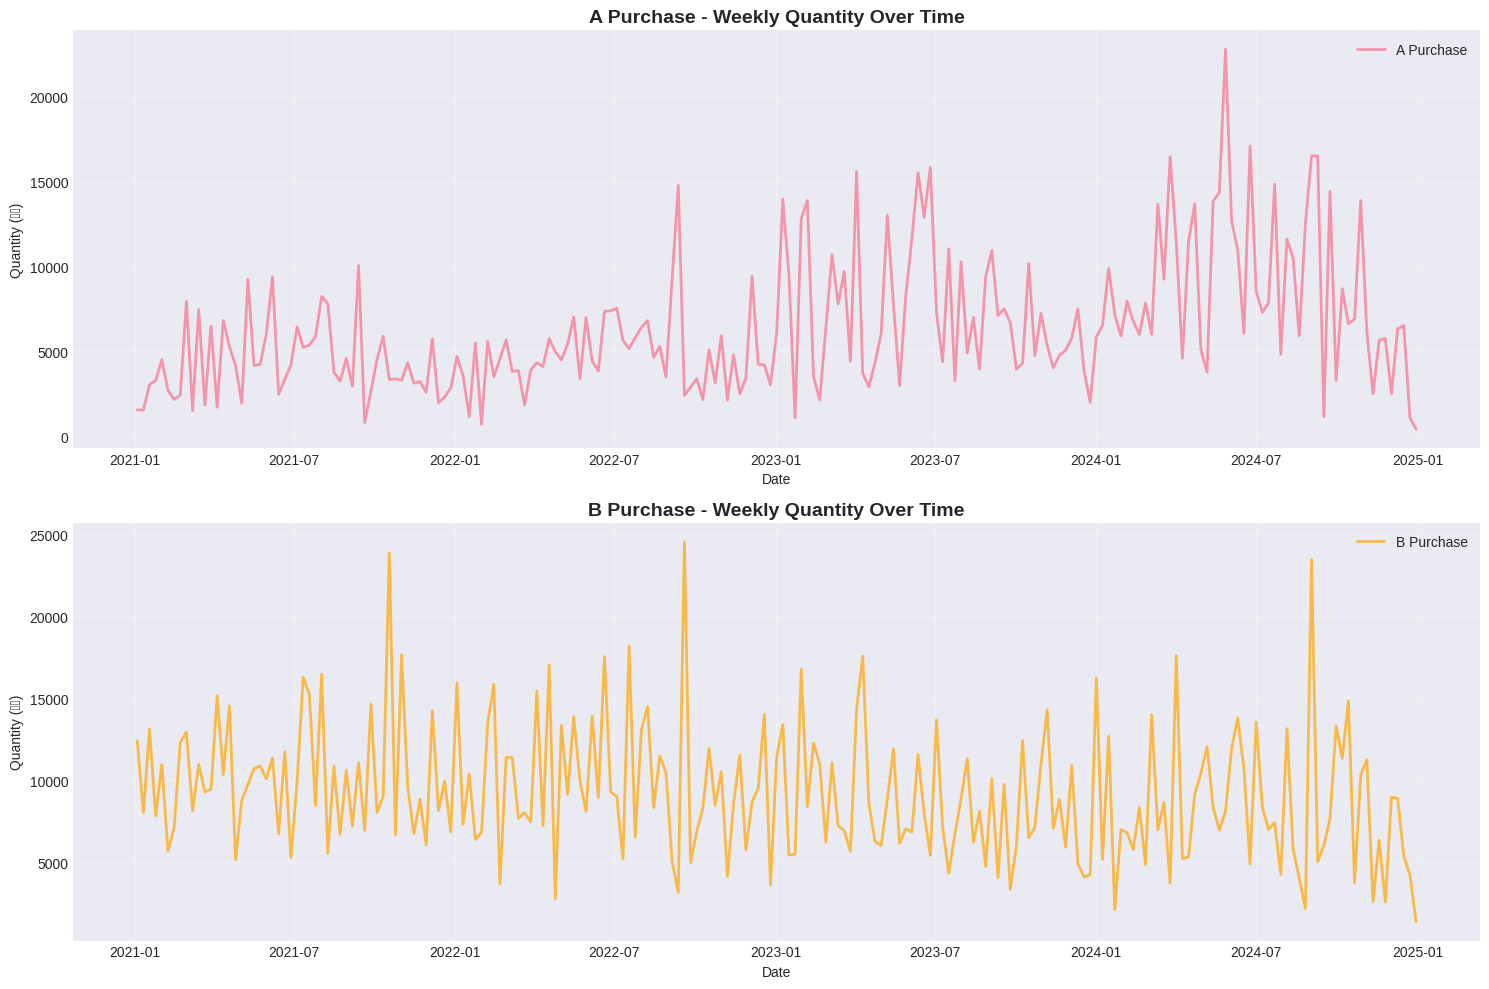

/tmp/ipython-input-627013837.py:103: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:103: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:103: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:103: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


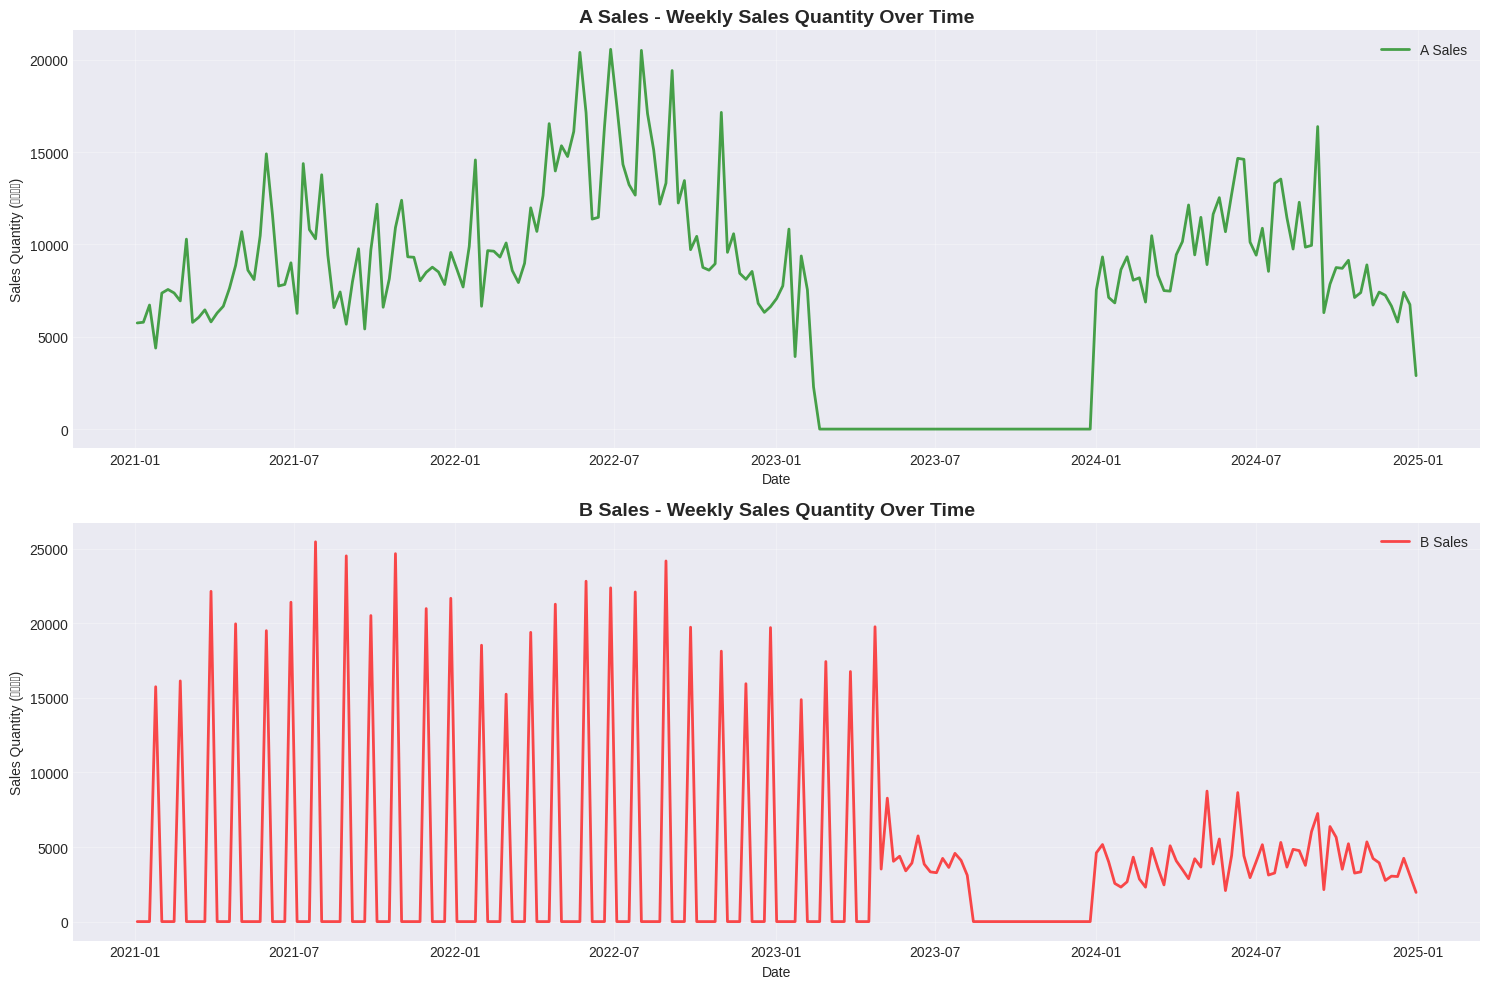


4. DISTRIBUTION ANALYSIS


/tmp/ipython-input-627013837.py:148: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:148: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:148: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:148: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Liberation Sans.
  plt.tight_layout()


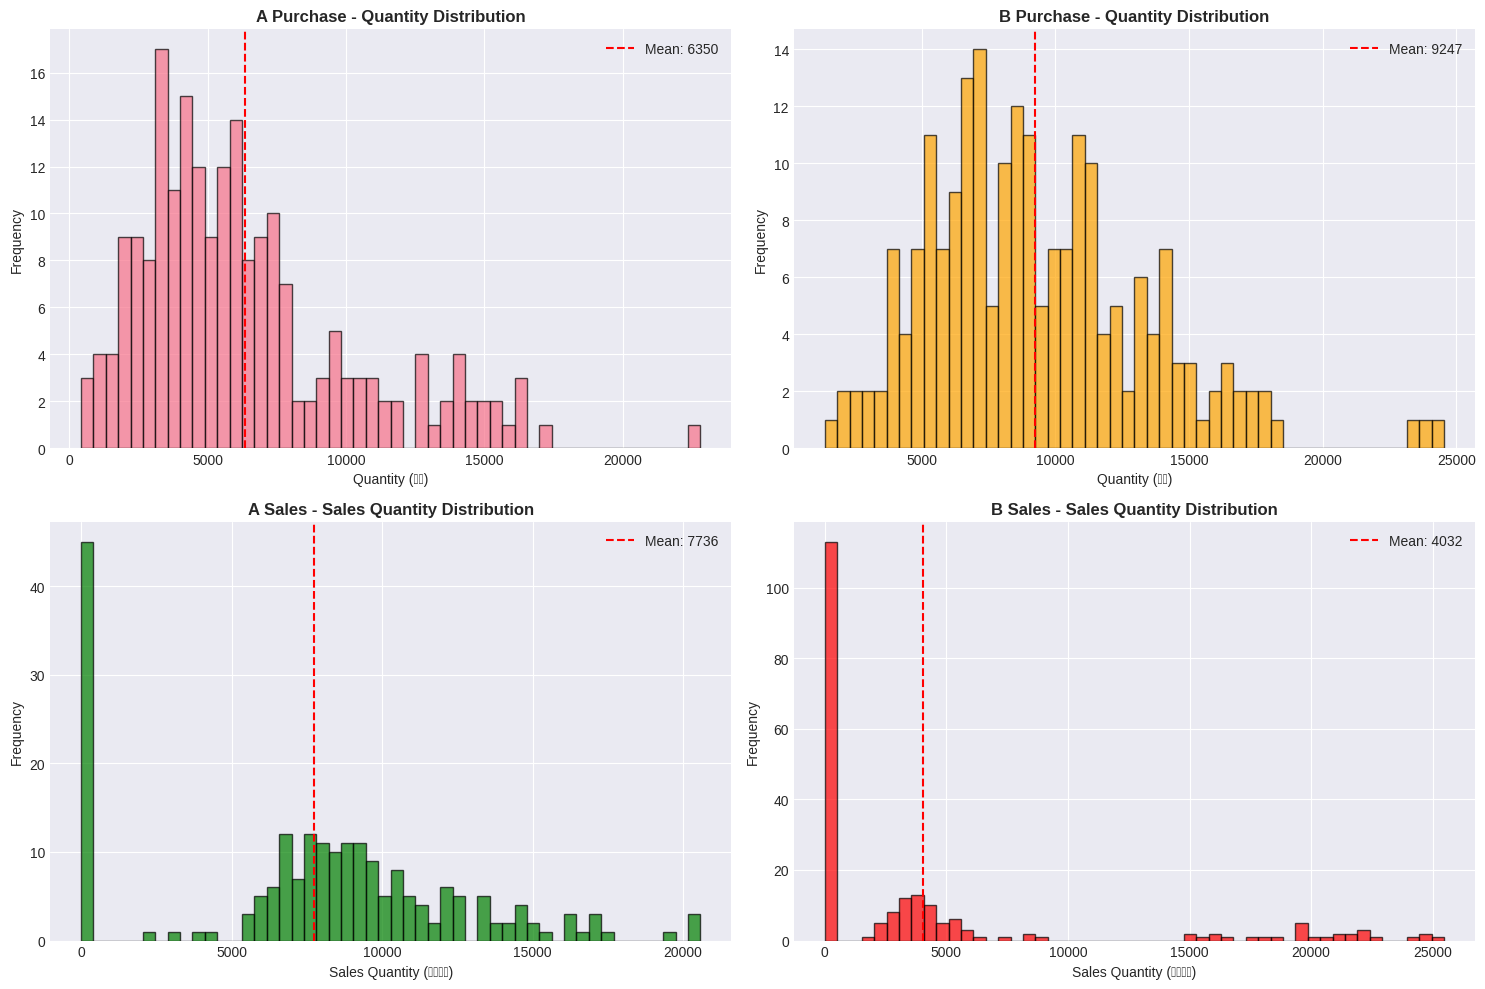


5. EXTERNAL FACTORS


/tmp/ipython-input-627013837.py:189: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:189: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:189: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:189: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:189: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools

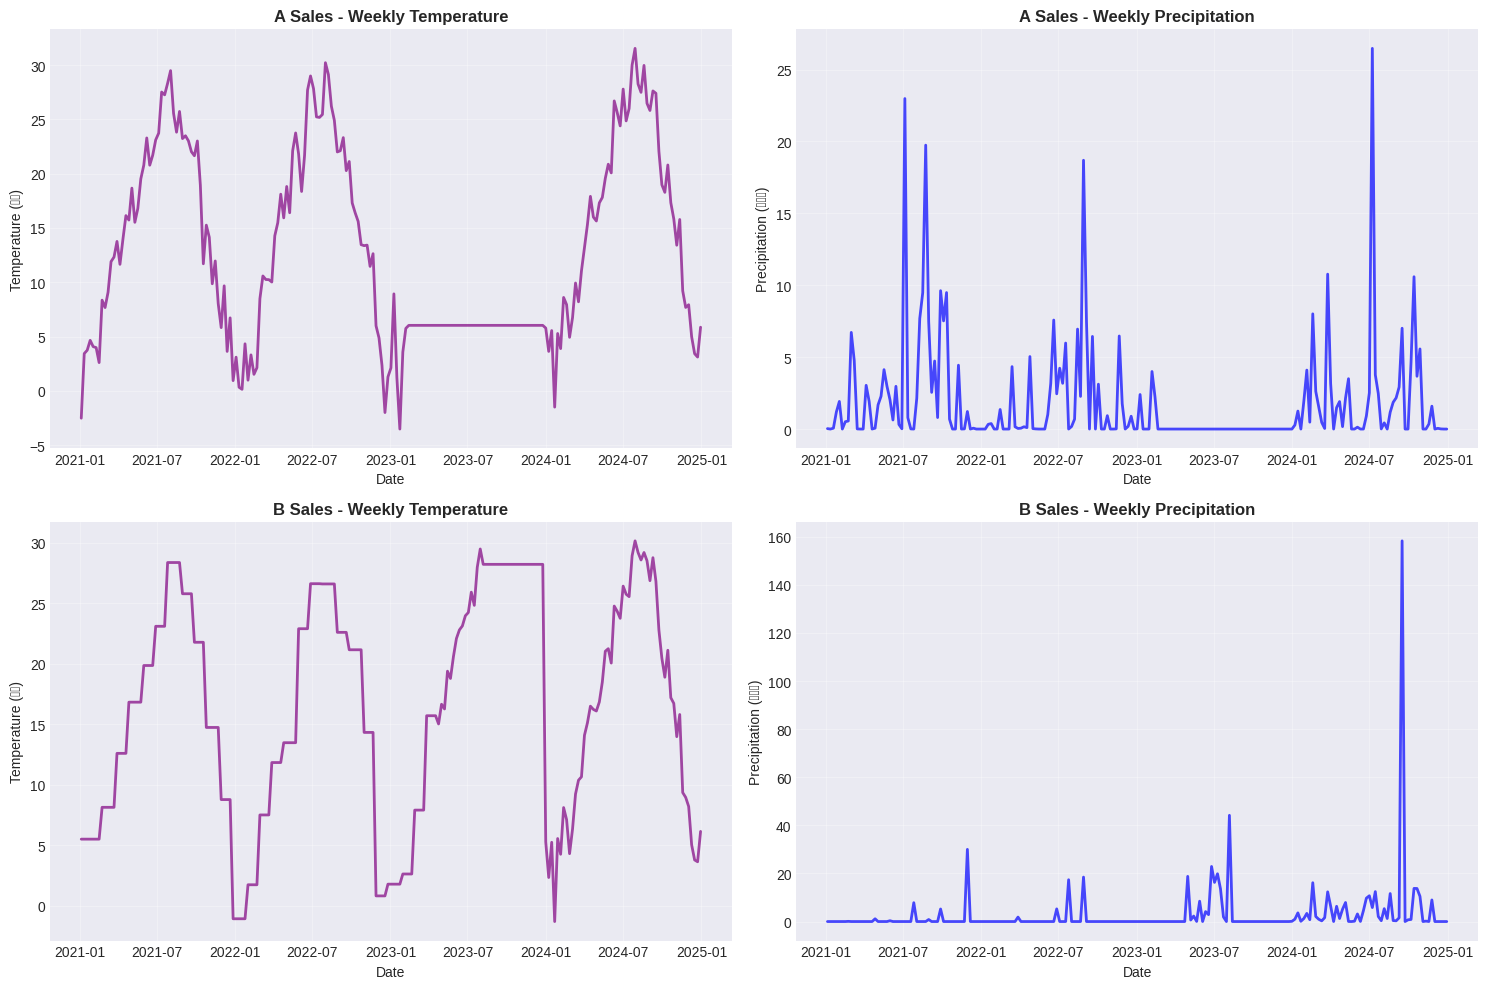

/tmp/ipython-input-627013837.py:223: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:223: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:223: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-627013837.py:223: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

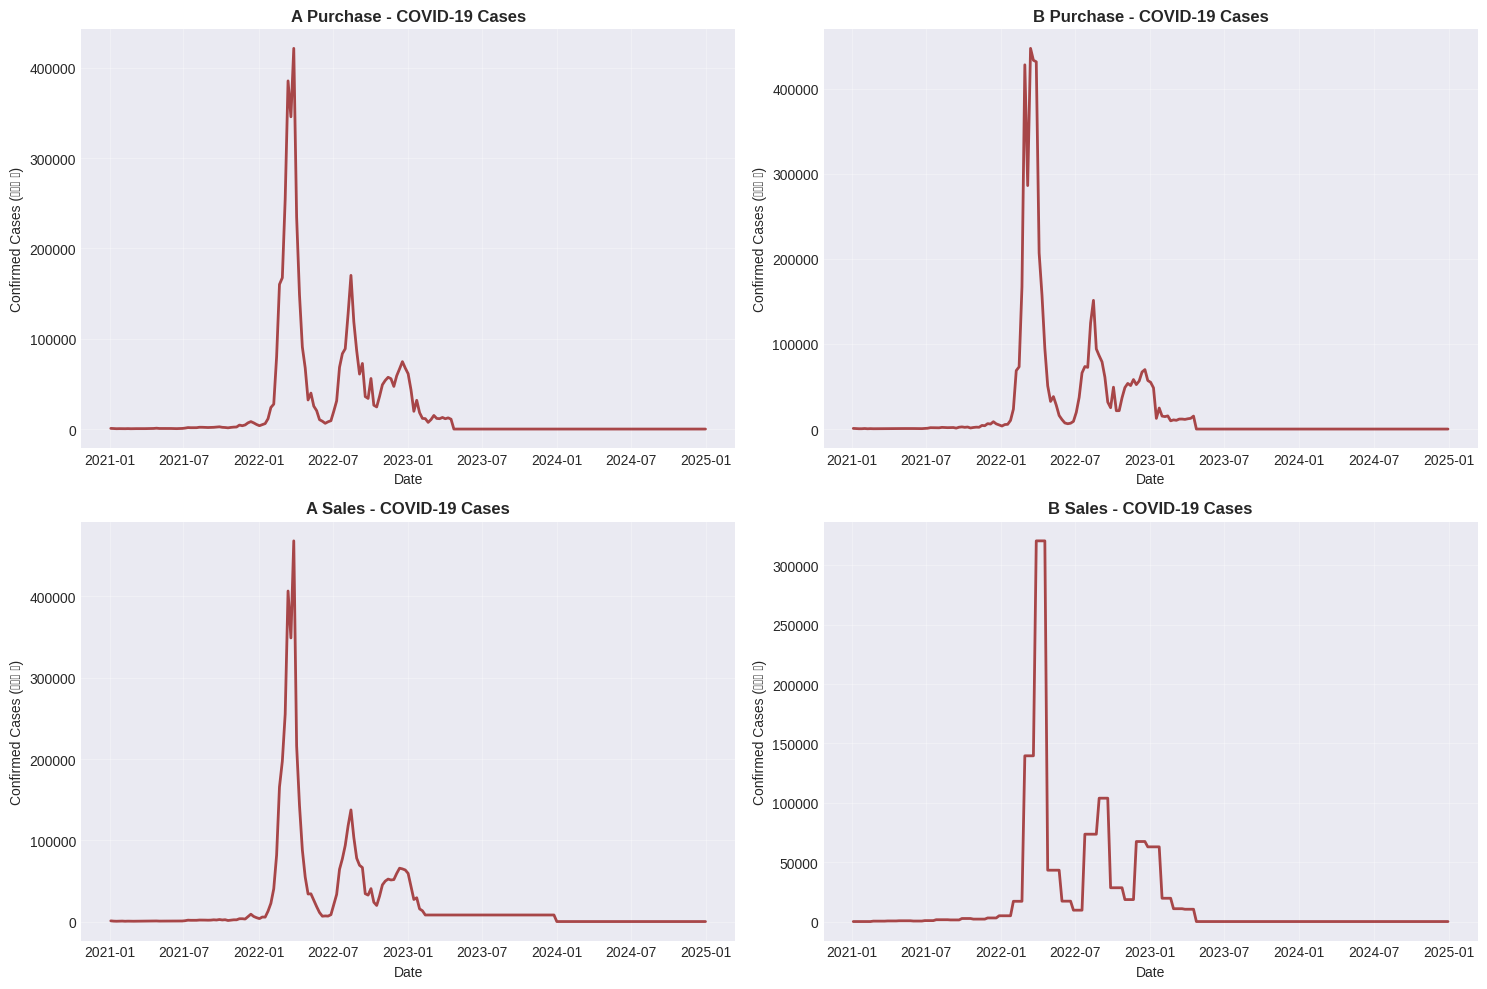


6. CORRELATION ANALYSIS


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) Liberation Sans

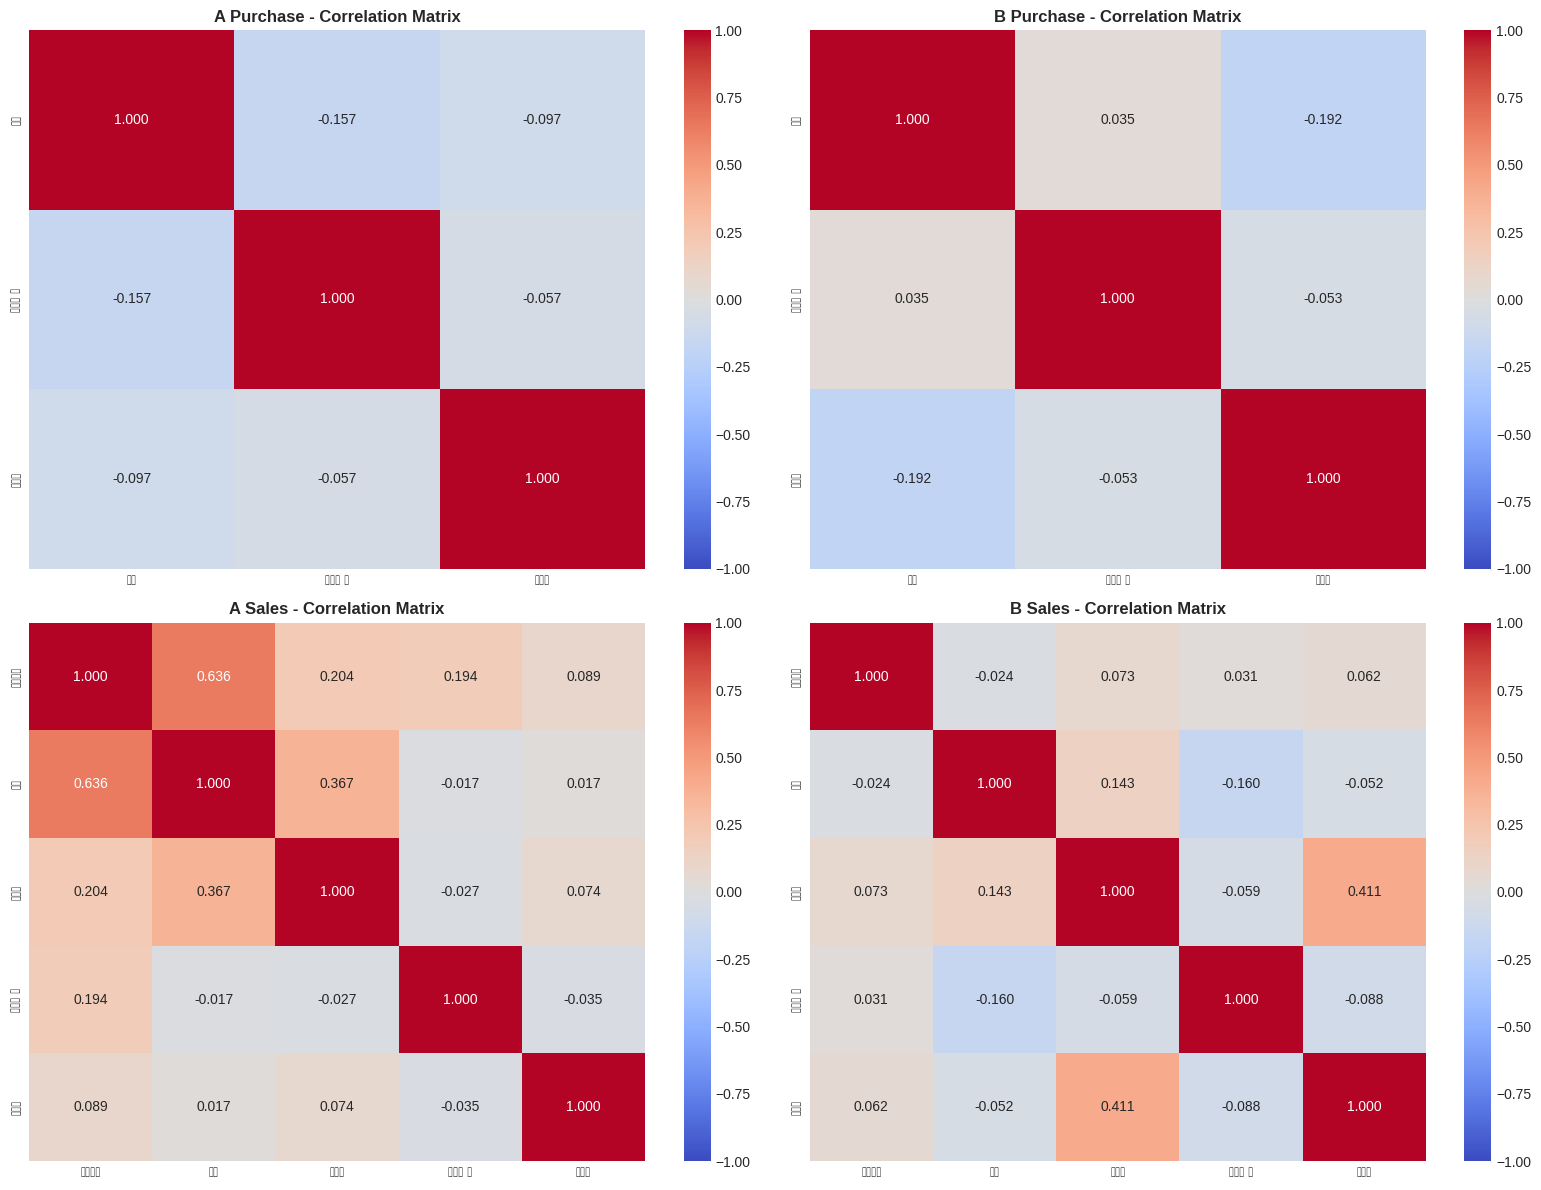


Correlation with Target Variable:

A Purchase (수량):
수량       1.000000
공휴일     -0.096714
확진자 수   -0.157184
Name: 수량, dtype: float64

B Purchase (수량):
수량       1.000000
확진자 수    0.035203
공휴일     -0.192055
Name: 수량, dtype: float64

A Sales (판매수량):
판매수량     1.000000
온도       0.635631
강수량      0.203785
확진자 수    0.193618
공휴일      0.088780
Name: 판매수량, dtype: float64

B Sales (판매수량):
판매수량     1.000000
강수량      0.073158
공휴일      0.061717
확진자 수    0.031210
온도      -0.023821
Name: 판매수량, dtype: float64

7. SEASONALITY ANALYSIS


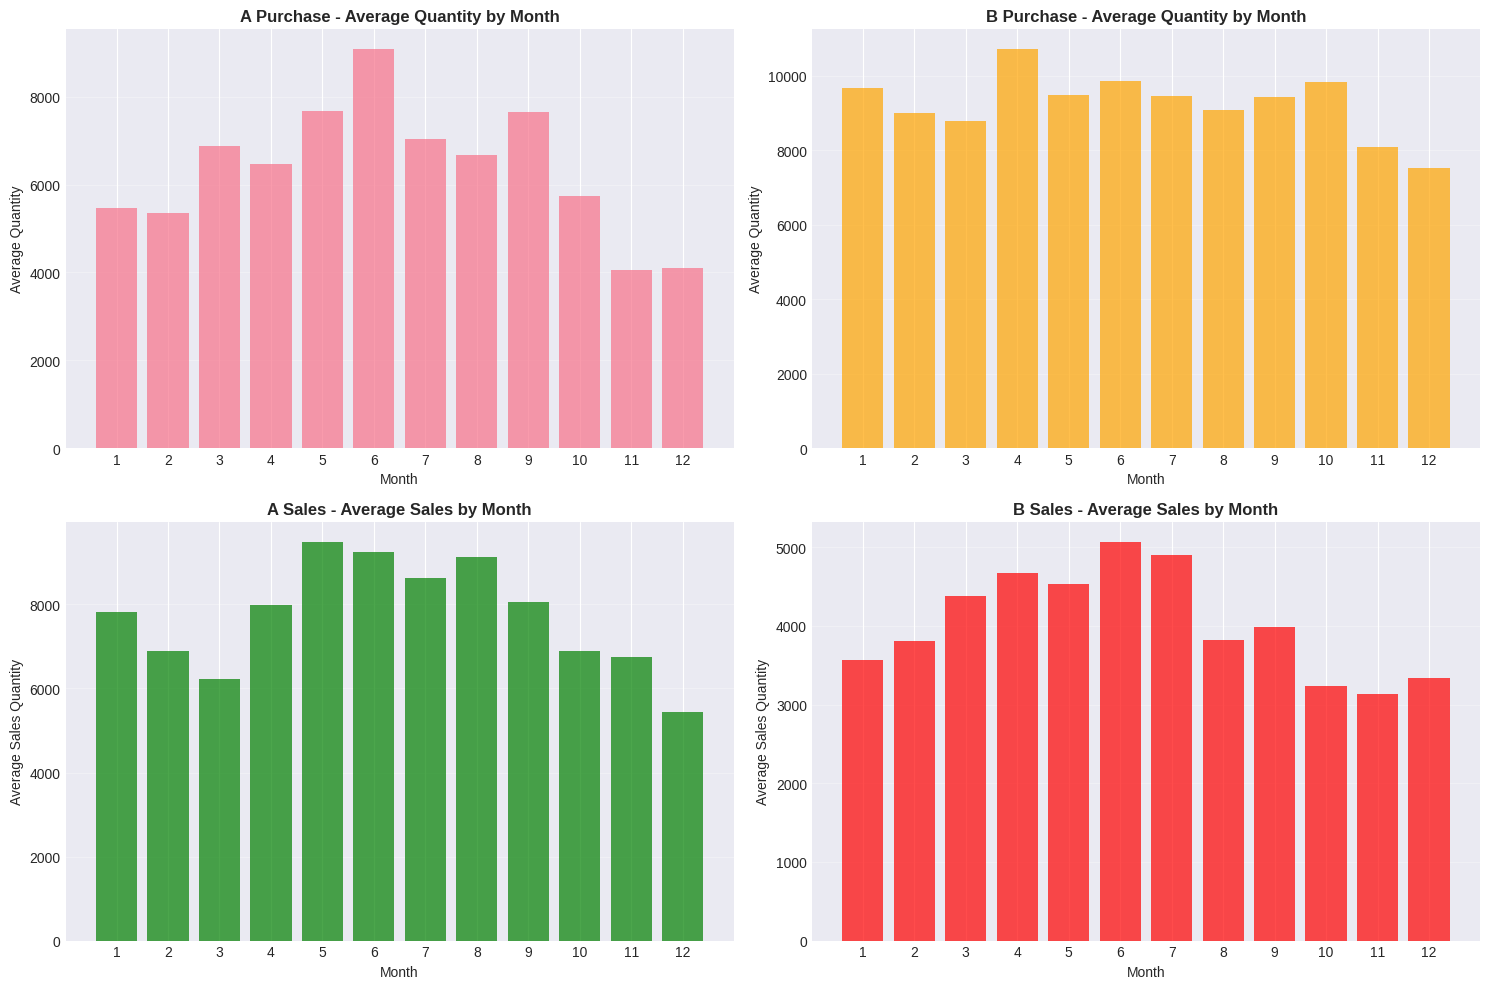


8. HOLIDAY IMPACT ANALYSIS

A Purchase:
  Holiday weeks - Mean 수량: 5874.85
  Non-holiday weeks - Mean 수량: 6441.74
  Difference: -566.88 (-8.8%)

B Purchase:
  Holiday weeks - Mean 수량: 7791.82
  Non-holiday weeks - Mean 수량: 9530.27
  Difference: -1738.45 (-18.2%)

A Sales:
  Holiday weeks - Mean 판매수량: 9152.75
  Non-holiday weeks - Mean 판매수량: 7516.29
  Difference: 1636.46 (21.8%)

B Sales:
  Holiday weeks - Mean 판매수량: 4873.29
  Non-holiday weeks - Mean 판매수량: 3957.70
  Difference: 915.59 (23.1%)


/tmp/ipython-input-627013837.py:356: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot([a_purchase_complete[a_purchase_complete['공휴일']==0]['수량'],
/tmp/ipython-input-627013837.py:364: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([b_purchase_complete[b_purchase_complete['공휴일']==0]['수량'],
/tmp/ipython-input-627013837.py:372: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([a_sales_complete[a_sales_complete['공휴일']==0]['판매수량'],
/tmp/ipython-input-627013837.py:380: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplo

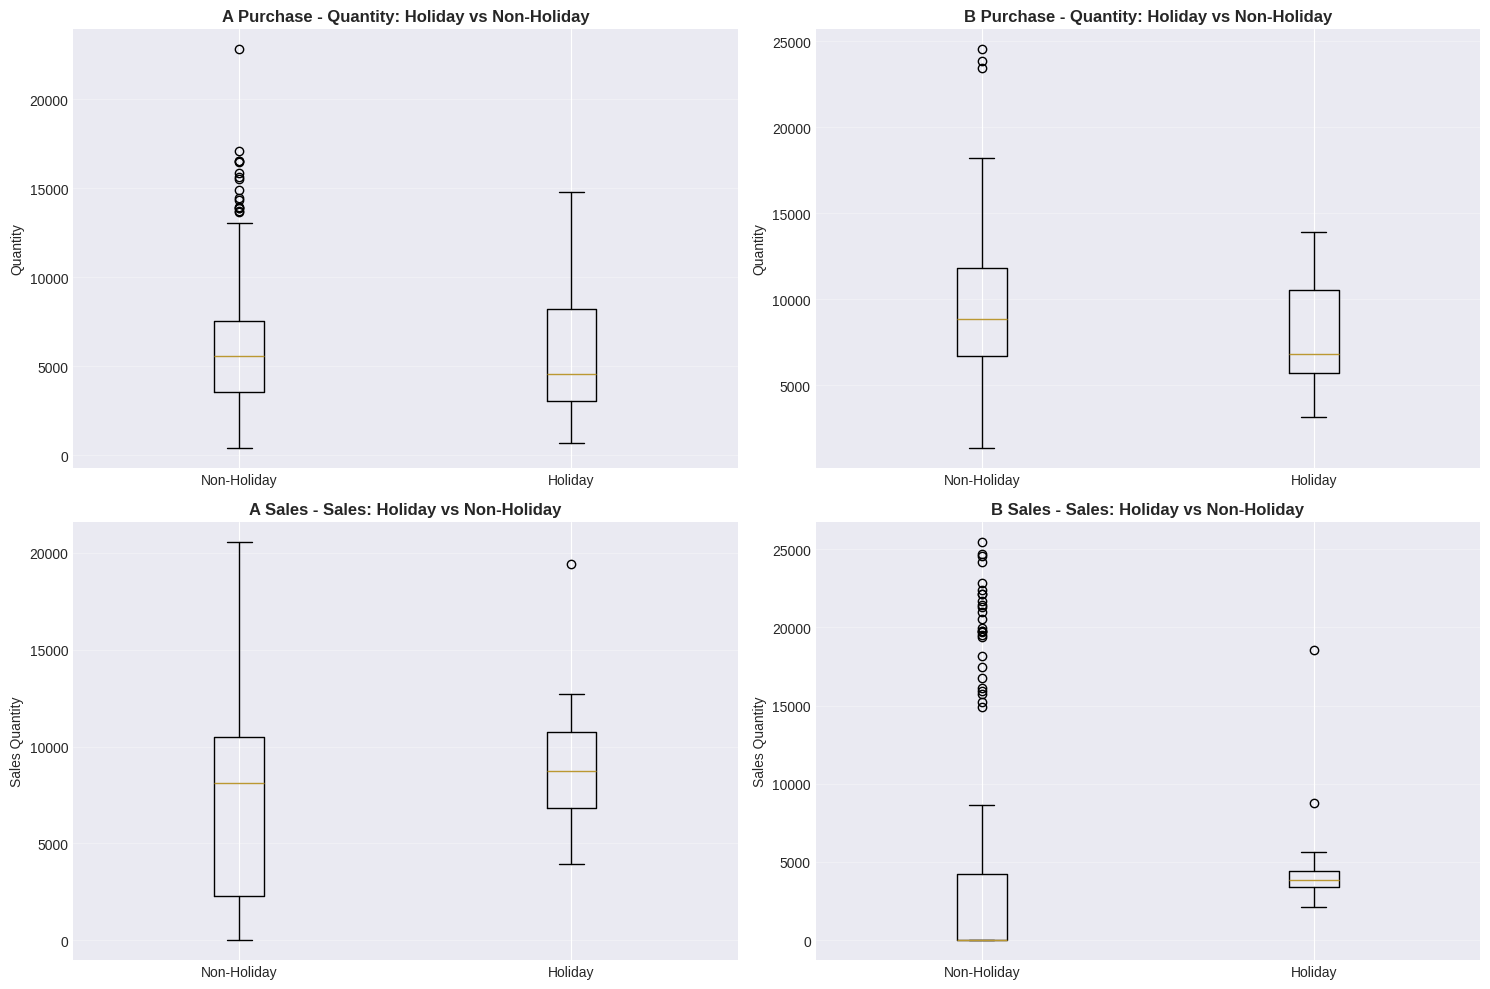


9. YEARLY TREND ANALYSIS

A Purchase - Yearly Average Quantity:
year
2021    4295.17
2022    4843.69
2023    7410.98
2024    8801.08
Name: 수량, dtype: float64

B Purchase - Yearly Average Quantity:
year
2021    10265.67
2022     9968.98
2023     8482.31
2024     8291.26
Name: 수량, dtype: float64

A Sales - Yearly Average Sales:
year
2021     8505.52
2022    12132.77
2023      938.56
2024     9334.53
Name: 판매수량, dtype: float64

B Sales - Yearly Average Sales:
year
2021    4861.04
2022    4605.62
2023    2543.85
2024    4116.58
Name: 판매수량, dtype: float64

10. ZERO ACTIVITY WEEKS

A Purchase - Weeks with zero quantity: 0 (0.0%)
B Purchase - Weeks with zero quantity: 0 (0.0%)
A Sales - Weeks with zero sales: 45 (21.5%)
B Sales - Weeks with zero sales: 113 (54.1%)

EDA COMPLETE!


In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure matplotlib for better looking plots
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

print("="*80)
print("EXPLORATORY DATA ANALYSIS - WEEKLY AGGREGATED DATA")
print("="*80)

# ============================================================================
# 1. BASIC STATISTICS
# ============================================================================
print("\n" + "="*80)
print("1. BASIC STATISTICS")
print("="*80)

print("\n--- A PURCHASE DATA ---")
print(a_purchase_complete[['수량', '확진자 수', '공휴일']].describe())

print("\n--- B PURCHASE DATA ---")
print(b_purchase_complete[['수량', '확진자 수', '공휴일']].describe())

print("\n--- A SALES DATA ---")
print(a_sales_complete[['판매수량', '온도', '강수량', '확진자 수', '공휴일']].describe())

print("\n--- B SALES DATA ---")
print(b_sales_complete[['판매수량', '온도', '강수량', '확진자 수', '공휴일']].describe())

# ============================================================================
# 2. DATA COMPLETENESS CHECK
# ============================================================================
print("\n" + "="*80)
print("2. DATA COMPLETENESS")
print("="*80)

def check_completeness(df, name):
    print(f"\n{name}:")
    print(f"  Total weeks: {len(df)}")
    print(f"  Missing values:")
    for col in df.columns:
        missing = df[col].isnull().sum()
        if missing > 0:
            print(f"    {col}: {missing} ({missing/len(df)*100:.1f}%)")
    if df.isnull().sum().sum() == 0:
        print("    No missing values!")

check_completeness(a_purchase_complete, "A Purchase")
check_completeness(b_purchase_complete, "B Purchase")
check_completeness(a_sales_complete, "A Sales")
check_completeness(b_sales_complete, "B Sales")

# ============================================================================
# 3. TIME SERIES VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("3. TIME SERIES PLOTS")
print("="*80)

# Purchase Data - Quantity over time
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(a_purchase_complete['week_start'], a_purchase_complete['수량'],
             label='A Purchase', linewidth=2, alpha=0.7)
axes[0].set_title('A Purchase - Weekly Quantity Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Quantity (수량)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(b_purchase_complete['week_start'], b_purchase_complete['수량'],
             label='B Purchase', linewidth=2, alpha=0.7, color='orange')
axes[1].set_title('B Purchase - Weekly Quantity Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Quantity (수량)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sales Data - Sales Quantity over time
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(a_sales_complete['week_start'], a_sales_complete['판매수량'],
             label='A Sales', linewidth=2, alpha=0.7, color='green')
axes[0].set_title('A Sales - Weekly Sales Quantity Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales Quantity (판매수량)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(b_sales_complete['week_start'], b_sales_complete['판매수량'],
             label='B Sales', linewidth=2, alpha=0.7, color='red')
axes[1].set_title('B Sales - Weekly Sales Quantity Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sales Quantity (판매수량)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. DISTRIBUTION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("4. DISTRIBUTION ANALYSIS")
print("="*80)

# Purchase Quantity Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(a_purchase_complete['수량'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('A Purchase - Quantity Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Quantity (수량)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(a_purchase_complete['수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {a_purchase_complete['수량'].mean():.0f}")
axes[0, 0].legend()

axes[0, 1].hist(b_purchase_complete['수량'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('B Purchase - Quantity Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Quantity (수량)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(b_purchase_complete['수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {b_purchase_complete['수량'].mean():.0f}")
axes[0, 1].legend()

axes[1, 0].hist(a_sales_complete['판매수량'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('A Sales - Sales Quantity Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Sales Quantity (판매수량)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(a_sales_complete['판매수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {a_sales_complete['판매수량'].mean():.0f}")
axes[1, 0].legend()

axes[1, 1].hist(b_sales_complete['판매수량'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('B Sales - Sales Quantity Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Sales Quantity (판매수량)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(b_sales_complete['판매수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {b_sales_complete['판매수량'].mean():.0f}")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 5. EXTERNAL FACTORS VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("5. EXTERNAL FACTORS")
print("="*80)

# Temperature and Precipitation (Sales data only)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(a_sales_complete['week_start'], a_sales_complete['온도'],
                linewidth=2, alpha=0.7, color='purple')
axes[0, 0].set_title('A Sales - Weekly Temperature', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Temperature (온도)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(a_sales_complete['week_start'], a_sales_complete['강수량'],
                linewidth=2, alpha=0.7, color='blue')
axes[0, 1].set_title('A Sales - Weekly Precipitation', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Precipitation (강수량)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(b_sales_complete['week_start'], b_sales_complete['온도'],
                linewidth=2, alpha=0.7, color='purple')
axes[1, 0].set_title('B Sales - Weekly Temperature', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Temperature (온도)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(b_sales_complete['week_start'], b_sales_complete['강수량'],
                linewidth=2, alpha=0.7, color='blue')
axes[1, 1].set_title('B Sales - Weekly Precipitation', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Precipitation (강수량)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# COVID Cases
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(a_purchase_complete['week_start'], a_purchase_complete['확진자 수'],
                linewidth=2, alpha=0.7, color='darkred')
axes[0, 0].set_title('A Purchase - COVID-19 Cases', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Confirmed Cases (확진자 수)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(b_purchase_complete['week_start'], b_purchase_complete['확진자 수'],
                linewidth=2, alpha=0.7, color='darkred')
axes[0, 1].set_title('B Purchase - COVID-19 Cases', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Confirmed Cases (확진자 수)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(a_sales_complete['week_start'], a_sales_complete['확진자 수'],
                linewidth=2, alpha=0.7, color='darkred')
axes[1, 0].set_title('A Sales - COVID-19 Cases', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Confirmed Cases (확진자 수)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(b_sales_complete['week_start'], b_sales_complete['확진자 수'],
                linewidth=2, alpha=0.7, color='darkred')
axes[1, 1].set_title('B Sales - COVID-19 Cases', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Confirmed Cases (확진자 수)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("6. CORRELATION ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A Purchase
corr_a_purchase = a_purchase_complete[['수량', '확진자 수', '공휴일']].corr()
sns.heatmap(corr_a_purchase, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, ax=axes[0, 0], vmin=-1, vmax=1)
axes[0, 0].set_title('A Purchase - Correlation Matrix', fontweight='bold')

# B Purchase
corr_b_purchase = b_purchase_complete[['수량', '확진자 수', '공휴일']].corr()
sns.heatmap(corr_b_purchase, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, ax=axes[0, 1], vmin=-1, vmax=1)
axes[0, 1].set_title('B Purchase - Correlation Matrix', fontweight='bold')

# A Sales
corr_a_sales = a_sales_complete[['판매수량', '온도', '강수량', '확진자 수', '공휴일']].corr()
sns.heatmap(corr_a_sales, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, ax=axes[1, 0], vmin=-1, vmax=1)
axes[1, 0].set_title('A Sales - Correlation Matrix', fontweight='bold')

# B Sales
corr_b_sales = b_sales_complete[['판매수량', '온도', '강수량', '확진자 수', '공휴일']].corr()
sns.heatmap(corr_b_sales, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, ax=axes[1, 1], vmin=-1, vmax=1)
axes[1, 1].set_title('B Sales - Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.show()

# Print correlation insights
print("\nCorrelation with Target Variable:")
print("\nA Purchase (수량):")
print(corr_a_purchase['수량'].sort_values(ascending=False))

print("\nB Purchase (수량):")
print(corr_b_purchase['수량'].sort_values(ascending=False))

print("\nA Sales (판매수량):")
print(corr_a_sales['판매수량'].sort_values(ascending=False))

print("\nB Sales (판매수량):")
print(corr_b_sales['판매수량'].sort_values(ascending=False))

# ============================================================================
# 7. SEASONALITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("7. SEASONALITY ANALYSIS")
print("="*80)

# Add month and year for seasonality analysis
for df in [a_purchase_complete, b_purchase_complete, a_sales_complete, b_sales_complete]:
    df['month'] = df['week_start'].dt.month
    df['year'] = df['week_start'].dt.year

# Monthly average patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# A Purchase
monthly_a_purchase = a_purchase_complete.groupby('month')['수량'].mean()
axes[0, 0].bar(monthly_a_purchase.index, monthly_a_purchase.values, alpha=0.7)
axes[0, 0].set_title('A Purchase - Average Quantity by Month', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Quantity')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3, axis='y')

# B Purchase
monthly_b_purchase = b_purchase_complete.groupby('month')['수량'].mean()
axes[0, 1].bar(monthly_b_purchase.index, monthly_b_purchase.values, alpha=0.7, color='orange')
axes[0, 1].set_title('B Purchase - Average Quantity by Month', fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Quantity')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3, axis='y')

# A Sales
monthly_a_sales = a_sales_complete.groupby('month')['판매수량'].mean()
axes[1, 0].bar(monthly_a_sales.index, monthly_a_sales.values, alpha=0.7, color='green')
axes[1, 0].set_title('A Sales - Average Sales by Month', fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Sales Quantity')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# B Sales
monthly_b_sales = b_sales_complete.groupby('month')['판매수량'].mean()
axes[1, 1].bar(monthly_b_sales.index, monthly_b_sales.values, alpha=0.7, color='red')
axes[1, 1].set_title('B Sales - Average Sales by Month', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Sales Quantity')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# 8. HOLIDAY IMPACT ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("8. HOLIDAY IMPACT ANALYSIS")
print("="*80)

def analyze_holiday_impact(df, target_col, name):
    holiday_weeks = df[df['공휴일'] > 0][target_col]
    non_holiday_weeks = df[df['공휴일'] == 0][target_col]

    print(f"\n{name}:")
    print(f"  Holiday weeks - Mean {target_col}: {holiday_weeks.mean():.2f}")
    print(f"  Non-holiday weeks - Mean {target_col}: {non_holiday_weeks.mean():.2f}")
    print(f"  Difference: {holiday_weeks.mean() - non_holiday_weeks.mean():.2f} "
          f"({((holiday_weeks.mean() / non_holiday_weeks.mean() - 1) * 100):.1f}%)")

analyze_holiday_impact(a_purchase_complete, '수량', 'A Purchase')
analyze_holiday_impact(b_purchase_complete, '수량', 'B Purchase')
analyze_holiday_impact(a_sales_complete, '판매수량', 'A Sales')
analyze_holiday_impact(b_sales_complete, '판매수량', 'B Sales')

# Visualize holiday vs non-holiday
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# A Purchase
axes[0, 0].boxplot([a_purchase_complete[a_purchase_complete['공휴일']==0]['수량'],
                     a_purchase_complete[a_purchase_complete['공휴일']>0]['수량']],
                    labels=['Non-Holiday', 'Holiday'])
axes[0, 0].set_title('A Purchase - Quantity: Holiday vs Non-Holiday', fontweight='bold')
axes[0, 0].set_ylabel('Quantity')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# B Purchase
axes[0, 1].boxplot([b_purchase_complete[b_purchase_complete['공휴일']==0]['수량'],
                     b_purchase_complete[b_purchase_complete['공휴일']>0]['수량']],
                    labels=['Non-Holiday', 'Holiday'])
axes[0, 1].set_title('B Purchase - Quantity: Holiday vs Non-Holiday', fontweight='bold')
axes[0, 1].set_ylabel('Quantity')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# A Sales
axes[1, 0].boxplot([a_sales_complete[a_sales_complete['공휴일']==0]['판매수량'],
                     a_sales_complete[a_sales_complete['공휴일']>0]['판매수량']],
                    labels=['Non-Holiday', 'Holiday'])
axes[1, 0].set_title('A Sales - Sales: Holiday vs Non-Holiday', fontweight='bold')
axes[1, 0].set_ylabel('Sales Quantity')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# B Sales
axes[1, 1].boxplot([b_sales_complete[b_sales_complete['공휴일']==0]['판매수량'],
                     b_sales_complete[b_sales_complete['공휴일']>0]['판매수량']],
                    labels=['Non-Holiday', 'Holiday'])
axes[1, 1].set_title('B Sales - Sales: Holiday vs Non-Holiday', fontweight='bold')
axes[1, 1].set_ylabel('Sales Quantity')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# 9. TREND ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("9. YEARLY TREND ANALYSIS")
print("="*80)

# Yearly averages
print("\nA Purchase - Yearly Average Quantity:")
print(a_purchase_complete.groupby('year')['수량'].mean().round(2))

print("\nB Purchase - Yearly Average Quantity:")
print(b_purchase_complete.groupby('year')['수량'].mean().round(2))

print("\nA Sales - Yearly Average Sales:")
print(a_sales_complete.groupby('year')['판매수량'].mean().round(2))

print("\nB Sales - Yearly Average Sales:")
print(b_sales_complete.groupby('year')['판매수량'].mean().round(2))

# ============================================================================
# 10. ZERO ACTIVITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("10. ZERO ACTIVITY WEEKS")
print("="*80)

print(f"\nA Purchase - Weeks with zero quantity: {(a_purchase_complete['수량'] == 0).sum()} "
      f"({(a_purchase_complete['수량'] == 0).sum() / len(a_purchase_complete) * 100:.1f}%)")
print(f"B Purchase - Weeks with zero quantity: {(b_purchase_complete['수량'] == 0).sum()} "
      f"({(b_purchase_complete['수량'] == 0).sum() / len(b_purchase_complete) * 100:.1f}%)")
print(f"A Sales - Weeks with zero sales: {(a_sales_complete['판매수량'] == 0).sum()} "
      f"({(a_sales_complete['판매수량'] == 0).sum() / len(a_sales_complete) * 100:.1f}%)")
print(f"B Sales - Weeks with zero sales: {(b_sales_complete['판매수량'] == 0).sum()} "
      f"({(b_sales_complete['판매수량'] == 0).sum() / len(b_sales_complete) * 100:.1f}%)")

print("\n" + "="*80)
print("EDA COMPLETE!")
print("="*80)

we need to find specific periods to save in a_sales_complete and b_sales_complete and also analyse covid periods.

In [ ]:
# ========= 1) Quick zoom over a date window =========
def zoom_window(df, start, end, date_col='week_start', ycol='확진자 수', title='Zoom'):
    """
    Show a quick zoom of y over [start, end] and print basic stats.
    """
    dd = df.copy()
    dd[date_col] = pd.to_datetime(dd[date_col])
    mask = (dd[date_col] >= pd.to_datetime(start)) & (dd[date_col] <= pd.to_datetime(end))
    zz = dd.loc[mask, [date_col, ycol]].sort_values(date_col)

    print(f"\n=== {title} | {start} → {end} ===")
    print(f"Points: {len(zz)}")
    if len(zz) == 0:
        print("Empty window.")
        return

    print(f"min={zz[ycol].min():.2f}  max={zz[ycol].max():.2f}  mean={zz[ycol].mean():.2f}")

    # week-over-week percentage change
    pct = zz[ycol].pct_change() * 100
    if len(pct.dropna()) > 0:
        print(f"Median WoW %Δ: {pct.median():.2f}%  |  90th pct of |%Δ|: {pct.abs().quantile(0.9):.2f}%")

    # quick plot
    plt.figure(figsize=(14, 5))
    plt.plot(zz[date_col], zz[ycol], linewidth=2, marker='o', markersize=4)
    plt.title(f"{title}: {ycol}")
    plt.xlabel("Date")
    plt.ylabel(ycol)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# ========= 2) Find "stable" segments =========
def find_stable_segments(df, date_col='week_start', ycol='확진자 수',
                         roll=4, cv_thresh=0.25, pct_thresh=20.0, min_len=8):
    """
    Detect candidate stable segments using simple rules:
      - Low local volatility (coefficient of variation on a rolling window)
      - Moderate week-over-week changes
      - Minimal length threshold

    Parameters
    ----------
    roll : int
        Rolling window size in weeks to compute mean/std and local CV.
    cv_thresh : float
        Threshold for coefficient of variation (std/mean) to consider it "stable".
    pct_thresh : float
        Threshold for absolute WoW percent change.
    min_len : int
        Minimal segment length in points (weeks).

    Returns
    -------
    seg_df : pd.DataFrame
        Candidate segments with start, end, length, mean, CV, slope per week, and total % change.
    """
    s = df[[date_col, ycol]].copy()
    s[date_col] = pd.to_datetime(s[date_col])
    s = s.sort_values(date_col).dropna(subset=[ycol]).reset_index(drop=True)

    if len(s) < min_len:
        print(f"Not enough data points ({len(s)} < {min_len})")
        return pd.DataFrame()

    # rolling mean/std to compute local coefficient of variation
    rmean = s[ycol].rolling(roll, min_periods=roll).mean()
    rstd = s[ycol].rolling(roll, min_periods=roll).std()
    cv = (rstd / (rmean + 1e-9)).fillna(np.inf)

    # absolute week-over-week % change
    pct = s[ycol].pct_change().mul(100).abs().fillna(0)

    # stable if both metrics are within thresholds
    stable_mask = (cv <= cv_thresh) & (pct <= pct_thresh)

    # group consecutive True values into segments
    segments = []
    in_segment = False
    start_idx = None

    for i in range(len(stable_mask)):
        if stable_mask.iloc[i] and not in_segment:
            # Start new segment
            start_idx = i
            in_segment = True
        elif not stable_mask.iloc[i] and in_segment:
            # End current segment
            end_idx = i - 1
            if end_idx - start_idx + 1 >= min_len:
                segments.append((start_idx, end_idx))
            in_segment = False

    # Check if last segment extends to end
    if in_segment and start_idx is not None:
        end_idx = len(stable_mask) - 1
        if end_idx - start_idx + 1 >= min_len:
            segments.append((start_idx, end_idx))

    # Convert segments to DataFrame
    segment_data = []
    for start_idx, end_idx in segments:
        seg = s.iloc[start_idx:end_idx+1].copy()
        x = np.arange(len(seg))

        # linear trend slope per week
        if len(seg) >= 2:
            slope = np.polyfit(x, seg[ycol].values, 1)[0]
            change_pct = (seg[ycol].iloc[-1] / (seg[ycol].iloc[0] + 1e-9) - 1) * 100
        else:
            slope = 0
            change_pct = 0

        segment_data.append({
            'start': seg[date_col].iloc[0].date(),
            'end': seg[date_col].iloc[-1].date(),
            'len_weeks': len(seg),
            'mean': seg[ycol].mean(),
            'std': seg[ycol].std(),
            'cv': seg[ycol].std() / (seg[ycol].mean() + 1e-9),
            'slope_per_week': slope,
            'total_change_%': change_pct
        })

    seg_df = pd.DataFrame(segment_data)
    if not seg_df.empty:
        seg_df = seg_df.sort_values(['len_weeks', 'cv'], ascending=[False, True]).reset_index(drop=True)

    print("\n=== CANDIDATE STABLE SEGMENTS ===")
    if seg_df.empty:
        print("No stable segments found — try relaxing thresholds (increase pct_thresh and/or cv_thresh).")
    else:
        # print top-10 summary
        for i, r in seg_df.head(10).iterrows():
            print(f"{i+1:>2}. {r['start']} → {r['end']} | {int(r['len_weeks'])} wks | "
                  f"mean={r['mean']:.1f} cv={r['cv']:.2f} | slope/wk={r['slope_per_week']:.2f} | "
                  f"Δ={r['total_change_%']:.1f}%")

    return seg_df


# ========= 3) Plot with highlighted top-N segments =========
def plot_with_segments(df, seg_df, date_col='week_start', ycol='확진자 수', top_n=3, title='Overview'):
    """
    Plot the full series and highlight top-N candidate segments (by length, then CV).
    """
    s = df[[date_col, ycol]].copy()
    s[date_col] = pd.to_datetime(s[date_col])
    s = s.sort_values(date_col).dropna(subset=[ycol])

    plt.figure(figsize=(15, 6))
    plt.plot(s[date_col], s[ycol], linewidth=2, label=ycol, color='steelblue')

    # highlight selected segments
    colors = ['red', 'green', 'orange', 'purple', 'brown']
    for idx, (_, r) in enumerate(seg_df.head(top_n).iterrows()):
        a = pd.to_datetime(str(r['start']))
        b = pd.to_datetime(str(r['end']))
        color = colors[idx % len(colors)]
        plt.axvspan(a, b, alpha=0.2, color=color, label=f"Segment {idx+1}")

        # Add text label
        mid_date = a + (b - a) / 2
        y_pos = s[ycol].max() * (0.95 - idx * 0.05)
        plt.text(mid_date, y_pos, f"{r['len_weeks']} wks",
                fontsize=9, ha='center', bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ycol)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


=== Zoom | 2022-10-15 → 2023-04-01 ===
Points: 24
min=7397.48  max=74638.62  mean=35746.10
Median WoW %Δ: -2.35%  |  90th pct of |%Δ|: 46.80%


/tmp/ipython-input-2032529521.py:31: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2032529521.py:31: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2032529521.py:31: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2032529521.py:31: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

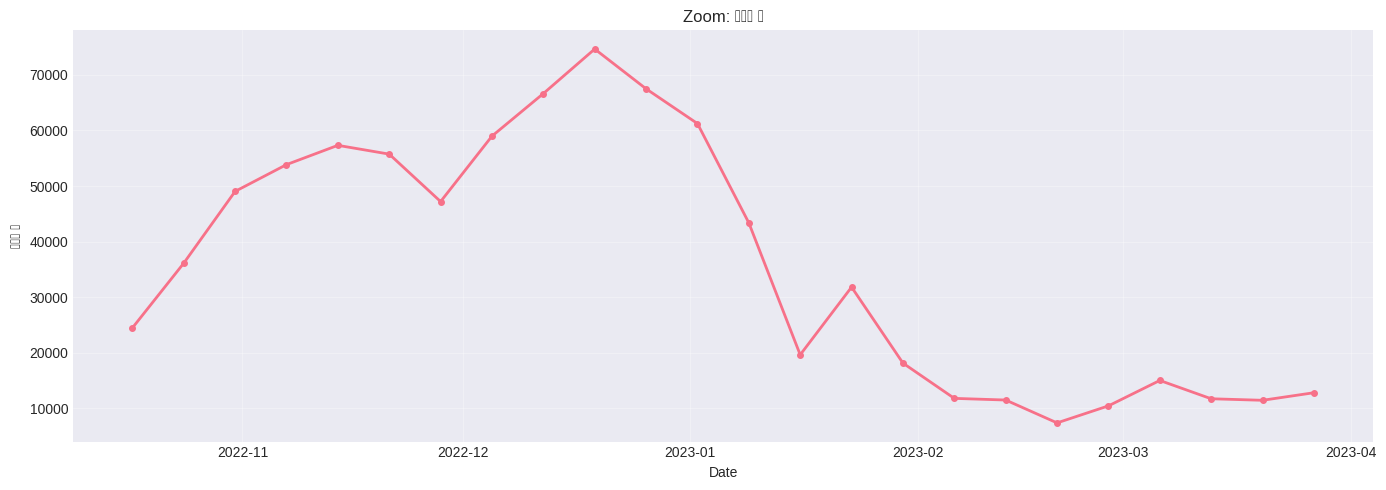

In [ ]:
zoom_window(a_purchase_complete, '2022-10-15', '2023-04-01')

**preparing dataset for the prediction**

DATA PREPARATION FOR PREDICTION

1. FILTERING SALES DATA

A Sales - Original shape: (209, 10)
A Sales - Filtered shape: (163, 10)
A Sales - Removed weeks: 46
A Sales - Date ranges kept:
  Period 1: 2021-01-04 00:00:00 to 2023-02-06 00:00:00
  Period 2: 2024-01-01 00:00:00 to 2024-12-30 00:00:00

B Sales - Original shape: (209, 10)
B Sales - Filtered shape: (67, 10)
B Sales - Removed weeks: 142
B Sales - Date ranges kept:
  Period 1: 2023-05-01 00:00:00 to 2023-07-31 00:00:00
  Period 2: 2024-01-01 00:00:00 to 2024-12-30 00:00:00

2. TRANSFORMING COVID DATA TO CATEGORICAL RANGES

A Purchase:
  COVID Category Distribution:
확진자 수_범위
0    89
1     1
2    72
3    47
Name: count, dtype: int64

  Sample comparisons (Original → Category):
    2023-04-24: 0 → 0
    2023-05-01: 0 → 0
    2022-06-13: 6357 → 1
    2021-01-04: 732 → 2
    2021-01-11: 538 → 2
    2022-02-07: 27598 → 3
    2022-02-14: 80061 → 3

B Purchase:
  COVID Category Distribution:
확진자 수_범위
0    89
1     2
2    74
3    44
Name:

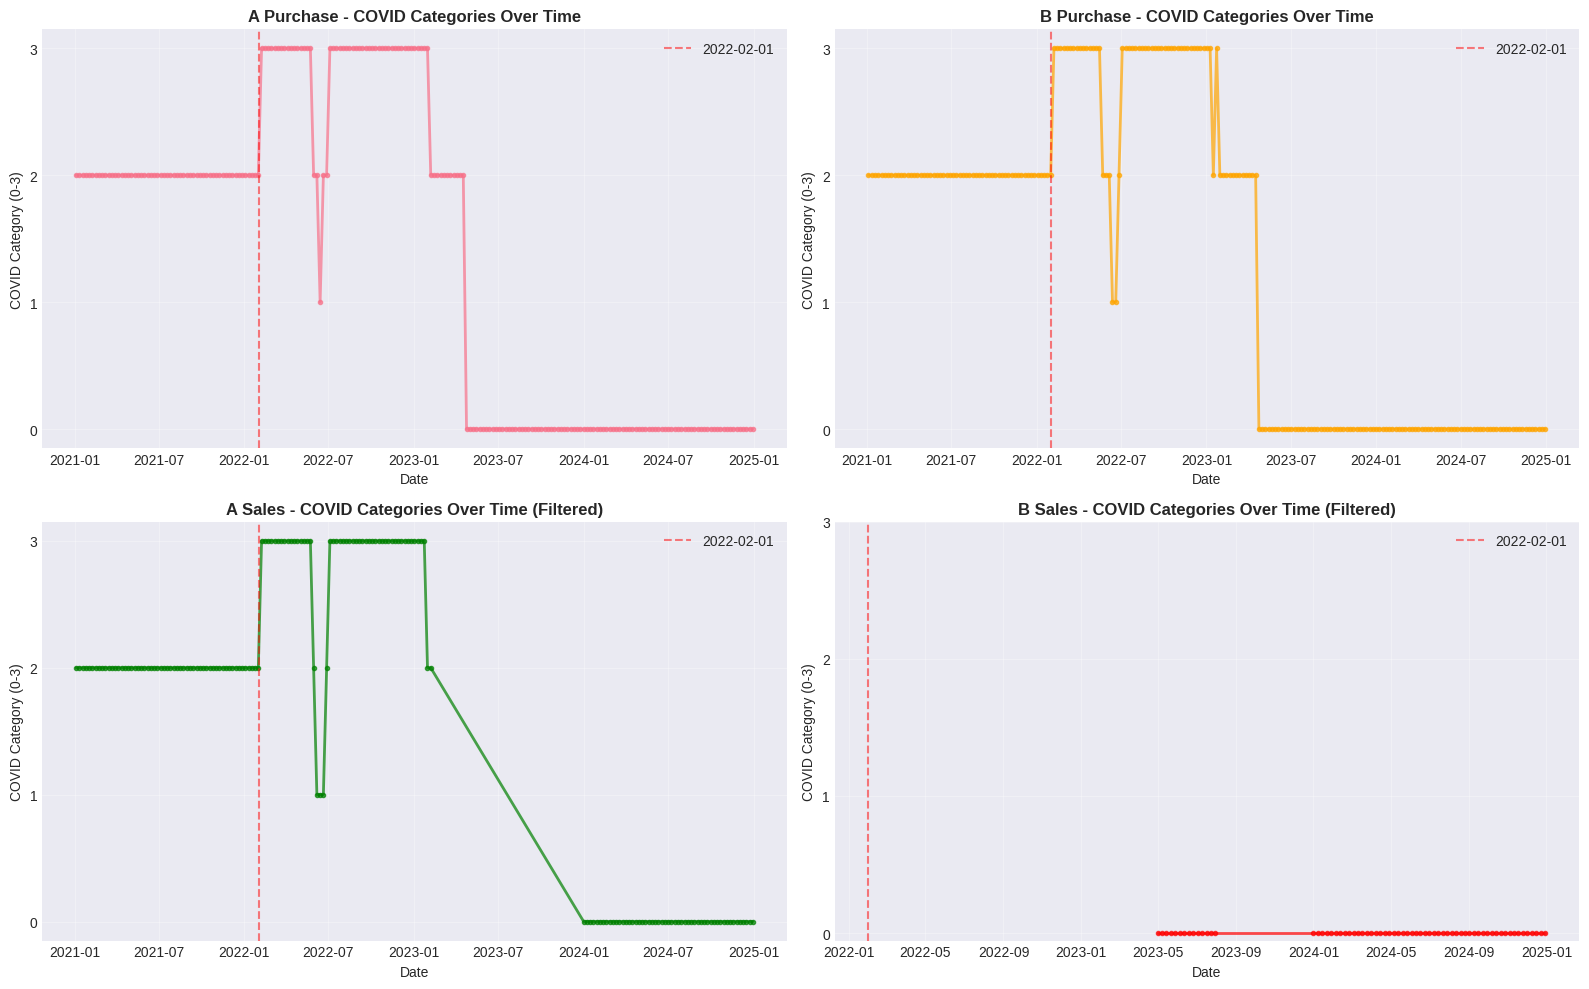


4. FINAL PREPARED DATASETS SUMMARY

A Purchase Prepared: (209, 8)
  Columns: ['week', 'week_start', '공급업체 코드', '수량', '공휴일', 'month', 'year', '확진자 수']
  Date range: 2021-01-04 00:00:00 to 2024-12-30 00:00:00

B Purchase Prepared: (209, 8)
  Columns: ['week', 'week_start', '공급업체 코드', '수량', '공휴일', 'month', 'year', '확진자 수']
  Date range: 2021-01-04 00:00:00 to 2024-12-30 00:00:00

A Sales Prepared: (163, 10)
  Columns: ['week', 'week_start', '매출처코드', '판매수량', '온도', '강수량', '공휴일', 'month', 'year', '확진자 수']
  Date range: 2021-01-04 00:00:00 to 2024-12-30 00:00:00
  Filtered periods preserved: 2 periods

B Sales Prepared: (67, 10)
  Columns: ['week', 'week_start', '매출처코드', '판매수량', '온도', '강수량', '공휴일', 'month', 'year', '확진자 수']
  Date range: 2023-05-01 00:00:00 to 2024-12-30 00:00:00
  Filtered periods preserved: 2 periods

DATA PREPARATION COMPLETE!

Datasets are now ready for prediction modeling.
Next step: Build forecasting models to predict Jan-Mar 2025.


In [ ]:
print("="*80)
print("DATA PREPARATION FOR PREDICTION")
print("="*80)

# ============================================================================
# 1. FILTER SALES DATA FOR SPECIFIC PERIODS
# ============================================================================
print("\n" + "="*80)
print("1. FILTERING SALES DATA")
print("="*80)

# A Sales: Keep [beginning : before 2023-02-12] and [2024-01-01 : end]
print("\nA Sales - Original shape:", a_sales_complete.shape)

a_sales_filtered = a_sales_complete[
    ((a_sales_complete['week_start'] < '2023-02-12') |
     (a_sales_complete['week_start'] >= '2024-01-01'))
].copy().reset_index(drop=True)

print("A Sales - Filtered shape:", a_sales_filtered.shape)
print("A Sales - Removed weeks:", len(a_sales_complete) - len(a_sales_filtered))
print("A Sales - Date ranges kept:")
print("  Period 1: {} to {}".format(
    a_sales_filtered[a_sales_filtered['week_start'] < '2023-02-12']['week_start'].min(),
    a_sales_filtered[a_sales_filtered['week_start'] < '2023-02-12']['week_start'].max()
))
print("  Period 2: {} to {}".format(
    a_sales_filtered[a_sales_filtered['week_start'] >= '2024-01-01']['week_start'].min(),
    a_sales_filtered[a_sales_filtered['week_start'] >= '2024-01-01']['week_start'].max()
))

# B Sales: Keep [2023-05-01 : 2023-08-01] and [2024-01-01 : end]
print("\nB Sales - Original shape:", b_sales_complete.shape)

b_sales_filtered = b_sales_complete[
    (((b_sales_complete['week_start'] >= '2023-05-01') &
      (b_sales_complete['week_start'] <= '2023-08-01')) |
     (b_sales_complete['week_start'] >= '2024-01-01'))
].copy().reset_index(drop=True)

print("B Sales - Filtered shape:", b_sales_filtered.shape)
print("B Sales - Removed weeks:", len(b_sales_complete) - len(b_sales_filtered))
print("B Sales - Date ranges kept:")
print("  Period 1: {} to {}".format(
    b_sales_filtered[(b_sales_filtered['week_start'] >= '2023-05-01') &
                     (b_sales_filtered['week_start'] <= '2023-08-01')]['week_start'].min(),
    b_sales_filtered[(b_sales_filtered['week_start'] >= '2023-05-01') &
                     (b_sales_filtered['week_start'] <= '2023-08-01')]['week_start'].max()
))
print("  Period 2: {} to {}".format(
    b_sales_filtered[b_sales_filtered['week_start'] >= '2024-01-01']['week_start'].min(),
    b_sales_filtered[b_sales_filtered['week_start'] >= '2024-01-01']['week_start'].max()
))

# ============================================================================
# 2. TRANSFORM COVID DATA INTO CATEGORICAL RANGES
# ============================================================================
print("\n" + "="*80)
print("2. TRANSFORMING COVID DATA TO CATEGORICAL RANGES")
print("="*80)

def categorize_covid(df, df_name):
    """
    Transform COVID cases into categorical ranges:
    - Before 2022-02-01 → 2 (regardless of actual number)
    - >= 17000 → 3
    - 7000 to < 17000 → 2
    - 2500 to < 7000 → 1
    - Other → 0
    """
    df_copy = df.copy()

    # Store original values for comparison
    original_covid = df_copy['확진자 수'].copy()

    # Initialize with 0
    df_copy['확진자 수_범위'] = 0

    # Apply conditions in order (most specific first)
    # Condition 1: Before 2022-02-01 → 2 (PRIORITY - checked first)
    mask_early_period = df_copy['week_start'] < '2022-02-01'
    df_copy.loc[mask_early_period, '확진자 수_범위'] = 2

    # For dates after 2022-02-01, apply number-based logic
    mask_after_2022 = df_copy['week_start'] >= '2022-02-01'

    # Condition 2: >= 17000 → 3
    mask_high = mask_after_2022 & (df_copy['확진자 수'] >= 17000)
    df_copy.loc[mask_high, '확진자 수_범위'] = 3

    # Condition 3: 7000 to < 17000 → 2
    mask_medium_high = mask_after_2022 & (df_copy['확진자 수'] >= 7000) & (df_copy['확진자 수'] < 17000)
    df_copy.loc[mask_medium_high, '확진자 수_범위'] = 2

    # Condition 4: 2500 to < 7000 → 1
    mask_medium = mask_after_2022 & (df_copy['확진자 수'] >= 2500) & (df_copy['확진자 수'] < 7000)
    df_copy.loc[mask_medium, '확진자 수_범위'] = 1

    # Condition 5: Other (< 2500 after 2022-02-01) → 0 (already initialized)

    # Show distribution
    print(f"\n{df_name}:")
    print("  COVID Category Distribution:")
    print(df_copy['확진자 수_범위'].value_counts().sort_index())
    print("\n  Sample comparisons (Original → Category):")

    # Show samples from each category
    for category in sorted(df_copy['확진자 수_범위'].unique()):
        sample = df_copy[df_copy['확진자 수_범위'] == category].head(2)
        if len(sample) > 0:
            for idx, row in sample.iterrows():
                print(f"    {row['week_start'].date()}: {original_covid.iloc[idx]:.0f} → {category}")

    # Remove the original 확진자 수 column and rename the new one
    df_copy = df_copy.drop('확진자 수', axis=1)
    df_copy = df_copy.rename(columns={'확진자 수_범위': '확진자 수'})

    return df_copy

# Apply transformation to all datasets
a_purchase_prepared = categorize_covid(a_purchase_complete, "A Purchase")
b_purchase_prepared = categorize_covid(b_purchase_complete, "B Purchase")
a_sales_prepared = categorize_covid(a_sales_filtered, "A Sales")
b_sales_prepared = categorize_covid(b_sales_filtered, "B Sales")

# ============================================================================
# 3. VISUALIZE TRANSFORMATION
# ============================================================================
print("\n" + "="*80)
print("3. VISUALIZATION OF COVID TRANSFORMATION")
print("="*80)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# A Purchase
axes[0, 0].plot(a_purchase_prepared['week_start'], a_purchase_prepared['확진자 수'],
                linewidth=2, marker='o', markersize=3, alpha=0.7)
axes[0, 0].set_title('A Purchase - COVID Categories Over Time', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('COVID Category (0-3)')
axes[0, 0].set_yticks([0, 1, 2, 3])
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(pd.to_datetime('2022-02-01'), color='red', linestyle='--',
                    label='2022-02-01', alpha=0.5)
axes[0, 0].legend()

# B Purchase
axes[0, 1].plot(b_purchase_prepared['week_start'], b_purchase_prepared['확진자 수'],
                linewidth=2, marker='o', markersize=3, alpha=0.7, color='orange')
axes[0, 1].set_title('B Purchase - COVID Categories Over Time', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('COVID Category (0-3)')
axes[0, 1].set_yticks([0, 1, 2, 3])
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(pd.to_datetime('2022-02-01'), color='red', linestyle='--',
                    label='2022-02-01', alpha=0.5)
axes[0, 1].legend()

# A Sales
axes[1, 0].plot(a_sales_prepared['week_start'], a_sales_prepared['확진자 수'],
                linewidth=2, marker='o', markersize=3, alpha=0.7, color='green')
axes[1, 0].set_title('A Sales - COVID Categories Over Time (Filtered)', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('COVID Category (0-3)')
axes[1, 0].set_yticks([0, 1, 2, 3])
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axvline(pd.to_datetime('2022-02-01'), color='red', linestyle='--',
                    label='2022-02-01', alpha=0.5)
axes[1, 0].legend()

# B Sales
axes[1, 1].plot(b_sales_prepared['week_start'], b_sales_prepared['확진자 수'],
                linewidth=2, marker='o', markersize=3, alpha=0.7, color='red')
axes[1, 1].set_title('B Sales - COVID Categories Over Time (Filtered)', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('COVID Category (0-3)')
axes[1, 1].set_yticks([0, 1, 2, 3])
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(pd.to_datetime('2022-02-01'), color='red', linestyle='--',
                    label='2022-02-01', alpha=0.5)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 4. SUMMARY
# ============================================================================
print("\n" + "="*80)
print("4. FINAL PREPARED DATASETS SUMMARY")
print("="*80)

print(f"\nA Purchase Prepared: {a_purchase_prepared.shape}")
print(f"  Columns: {list(a_purchase_prepared.columns)}")
print(f"  Date range: {a_purchase_prepared['week_start'].min()} to {a_purchase_prepared['week_start'].max()}")

print(f"\nB Purchase Prepared: {b_purchase_prepared.shape}")
print(f"  Columns: {list(b_purchase_prepared.columns)}")
print(f"  Date range: {b_purchase_prepared['week_start'].min()} to {b_purchase_prepared['week_start'].max()}")

print(f"\nA Sales Prepared: {a_sales_prepared.shape}")
print(f"  Columns: {list(a_sales_prepared.columns)}")
print(f"  Date range: {a_sales_prepared['week_start'].min()} to {a_sales_prepared['week_start'].max()}")
print(f"  Filtered periods preserved: 2 periods")

print(f"\nB Sales Prepared: {b_sales_prepared.shape}")
print(f"  Columns: {list(b_sales_prepared.columns)}")
print(f"  Date range: {b_sales_prepared['week_start'].min()} to {b_sales_prepared['week_start'].max()}")
print(f"  Filtered periods preserved: 2 periods")

print("\n" + "="*80)
print("DATA PREPARATION COMPLETE!")
print("="*80)
print("\nDatasets are now ready for prediction modeling.")
print("Next step: Build forecasting models to predict Jan-Mar 2025.")

# Optional: Save prepared datasets
# a_purchase_prepared.to_csv('a_purchase_prepared.csv', index=False, encoding='utf-8-sig')
# b_purchase_prepared.to_csv('b_purchase_prepared.csv', index=False, encoding='utf-8-sig')
# a_sales_prepared.to_csv('a_sales_prepared.csv', index=False, encoding='utf-8-sig')
# b_sales_prepared.to_csv('b_sales_prepared.csv', index=False, encoding='utf-8-sig')


DISTRIBUTION ANALYSIS


/tmp/ipython-input-4289948067.py:41: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4289948067.py:41: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4289948067.py:41: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4289948067.py:41: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

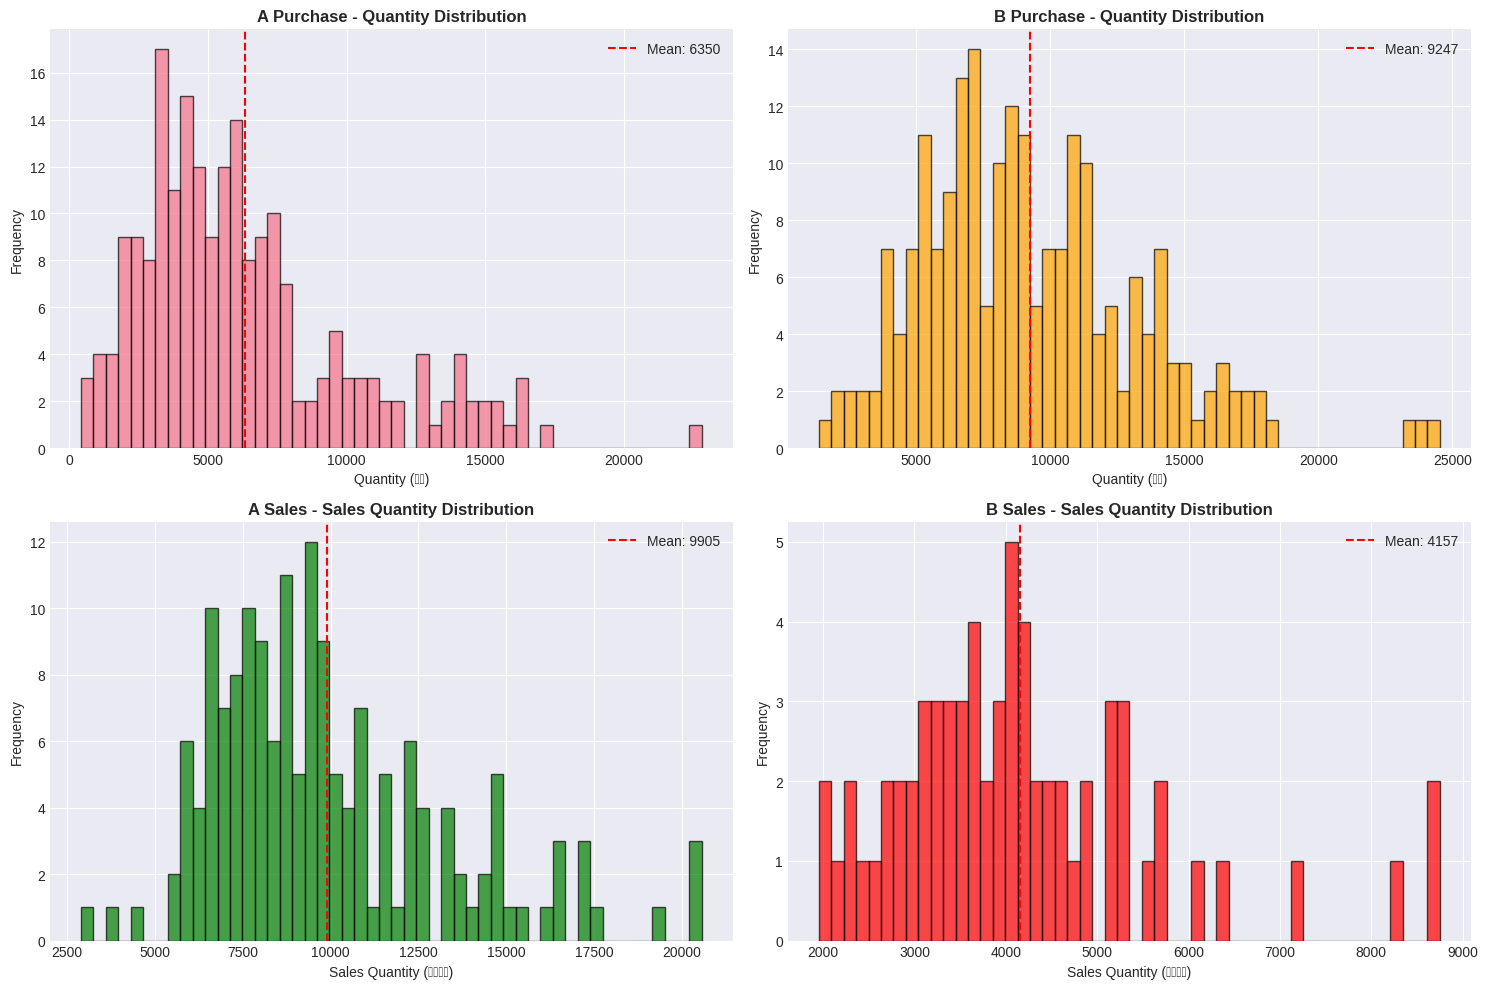

In [ ]:
# checking order quantity distributions
print("\n" + "="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)

# Purchase Quantity Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(a_purchase_prepared['수량'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('A Purchase - Quantity Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Quantity (수량)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(a_purchase_prepared['수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {a_purchase_prepared['수량'].mean():.0f}")
axes[0, 0].legend()

axes[0, 1].hist(b_purchase_prepared['수량'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('B Purchase - Quantity Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Quantity (수량)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(b_purchase_prepared['수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {b_purchase_prepared['수량'].mean():.0f}")
axes[0, 1].legend()

axes[1, 0].hist(a_sales_prepared['판매수량'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('A Sales - Sales Quantity Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Sales Quantity (판매수량)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(a_sales_prepared['판매수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {a_sales_prepared['판매수량'].mean():.0f}")
axes[1, 0].legend()

axes[1, 1].hist(b_sales_prepared['판매수량'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('B Sales - Sales Quantity Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Sales Quantity (판매수량)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(b_sales_prepared['판매수량'].mean(), color='red',
                    linestyle='--', label=f"Mean: {b_sales_prepared['판매수량'].mean():.0f}")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
print(a_purchase_prepared.info())
print(a_sales_prepared.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   week        209 non-null    period[W-SUN] 
 1   week_start  209 non-null    datetime64[ns]
 2   공급업체 코드     209 non-null    object        
 3   수량          209 non-null    int64         
 4   공휴일         209 non-null    int64         
 5   month       209 non-null    int32         
 6   year        209 non-null    int32         
 7   확진자 수       209 non-null    int64         
dtypes: datetime64[ns](1), int32(2), int64(3), object(1), period[W-SUN](1)
memory usage: 11.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   week        163 non-null    period[W-SUN] 
 1   week_start  163 non-null    datetime64[ns]
 2   매출처코드      

**Column preparation for the prediction**

In [ ]:
# we don't need covid data for the B sales dataset since there are only zero categories
b_sales_prepared = b_sales_prepared.drop("확진자 수", axis=1)

In [ ]:
# we don't need '공급업체 코드" or "매출처코드" data in the prediction
a_purchase_prepared = a_purchase_prepared.drop("공급업체 코드", axis=1)
b_purchase_prepared = b_purchase_prepared.drop("공급업체 코드", axis=1)
a_sales_prepared = a_sales_prepared.drop("매출처코드", axis=1)
b_sales_prepared = b_sales_prepared.drop("매출처코드", axis=1)

# Final preparation for the prediction data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("="*80)
print("PREPARING DATA FOR LSTM TIME SERIES PREDICTION")
print("="*80)

# ============================================================================
# STEP 1: PREPARE DATASET WITH PROPER LAG/LEAD FEATURES
# ============================================================================

def prepare_dataset_for_lstm(df, target_col, df_name, n_lags=4, n_leads_holiday=4):
    """
    Prepare dataset for LSTM prediction with lag features and future holiday info

    Parameters:
    - df: DataFrame with weekly data
    - target_col: Name of target column to predict ('수량' or '판매수량')
    - df_name: Name for logging
    - n_lags: Number of lag periods to create for target and features
    - n_leads_holiday: Number of future weeks of holiday info to include

    Returns:
    - df_features: DataFrame with features for modeling (no date columns)
    - df_dates: DataFrame with date/identifier columns for matching
    - feature_cols: List of feature column names
    - scaler_X: Fitted scaler for features
    - scaler_y: Fitted scaler for target
    """

    print(f"\n{'='*60}")
    print(f"Processing: {df_name}")
    print(f"{'='*60}")

    df = df.copy()

    # Separate date/identifier columns
    date_cols = ['week', 'week_start']
    if 'month' in df.columns:
        date_cols.append('month')
    if 'year' in df.columns:
        date_cols.append('year')

    df_dates = df[date_cols].copy()

    # Get feature columns (everything except dates and target)
    feature_cols_base = [col for col in df.columns if col not in date_cols and col != target_col]

    print(f"\nOriginal dataset shape: {df.shape}")
    print(f"Target column: {target_col}")
    print(f"Base feature columns: {feature_cols_base}")

    # ========================================================================
    # STEP 2: CREATE LAG AND LEAD FEATURES
    # ========================================================================

    print(f"\nCreating {n_lags} lag features for target and other variables...")
    print(f"Creating {n_leads_holiday} lead (future) features for holidays...")

    # Check for time gaps (non-consecutive weeks)
    df['week_ordinal'] = df['week'].apply(lambda x: x.ordinal)
    week_diffs = df['week_ordinal'].diff()
    gaps = week_diffs[week_diffs > 1]

    if len(gaps) > 0:
        print(f"⚠️  WARNING: Found {len(gaps)} time gaps in the data!")
        print(f"   Gap locations (indices): {gaps.index.tolist()}")
    else:
        print("✓ No time gaps found - data is continuous")

    # Create lag features for target variable
    for lag in range(1, n_lags + 1):
        df[f'{target_col}_lag{lag}'] = np.nan

    # Create lag features for non-holiday numeric features
    lag_feature_map = {}
    for col in feature_cols_base:
        if col != '공휴일' and df[col].dtype in ['int64', 'float64']:
            lag_feature_map[col] = []
            for lag in range(1, n_lags + 1):
                lag_col_name = f'{col}_lag{lag}'
                df[lag_col_name] = np.nan
                lag_feature_map[col].append(lag_col_name)

    # Create LEAD (future) features for holidays
    lead_holiday_cols = []
    if '공휴일' in feature_cols_base:
        for lead in range(1, n_leads_holiday + 1):
            lead_col_name = f'공휴일_lead{lead}'
            df[lead_col_name] = np.nan
            lead_holiday_cols.append(lead_col_name)
        print(f"  Created future holiday features: {lead_holiday_cols}")

    # Fill lag features for consecutive weeks
    for i in range(n_lags, len(df)):
        # Check if all previous n_lags weeks are consecutive
        is_consecutive_back = True
        for lag in range(1, n_lags + 1):
            if i - lag < 0:
                is_consecutive_back = False
                break
            week_diff = df.iloc[i]['week_ordinal'] - df.iloc[i - lag]['week_ordinal']
            if week_diff != lag:
                is_consecutive_back = False
                break

        # Only fill lags if weeks are consecutive
        if is_consecutive_back:
            # Fill target lags
            for lag in range(1, n_lags + 1):
                df.loc[df.index[i], f'{target_col}_lag{lag}'] = df.iloc[i - lag][target_col]

            # Fill feature lags (excluding holidays)
            for col in feature_cols_base:
                if col != '공휴일' and df[col].dtype in ['int64', 'float64']:
                    for lag in range(1, n_lags + 1):
                        df.loc[df.index[i], f'{col}_lag{lag}'] = df.iloc[i - lag][col]

    # Fill LEAD features for holidays
    if '공휴일' in feature_cols_base:
        for i in range(len(df) - n_leads_holiday):
            # Check if all future n_leads_holiday weeks are consecutive
            is_consecutive_forward = True
            for lead in range(1, n_leads_holiday + 1):
                if i + lead >= len(df):
                    is_consecutive_forward = False
                    break
                week_diff = df.iloc[i + lead]['week_ordinal'] - df.iloc[i]['week_ordinal']
                if week_diff != lead:
                    is_consecutive_forward = False
                    break

            # Only fill leads if weeks are consecutive
            if is_consecutive_forward:
                for lead in range(1, n_leads_holiday + 1):
                    df.loc[df.index[i], f'공휴일_lead{lead}'] = df.iloc[i + lead]['공휴일']

    # Drop the temporary week_ordinal column
    df = df.drop('week_ordinal', axis=1)

    # Get all feature columns (base + lags + leads)
    lag_cols_target = [f'{target_col}_lag{i}' for i in range(1, n_lags + 1)]
    lag_cols_features = []
    for col, lag_list in lag_feature_map.items():
        lag_cols_features.extend(lag_list)

    # Remove '공휴일' from base features since we're using leads instead
    feature_cols_base_modified = [col for col in feature_cols_base if col != '공휴일']

    all_feature_cols = feature_cols_base_modified + lag_cols_target + lag_cols_features + lead_holiday_cols

    # Remove rows with NaN in features
    rows_before = len(df)
    df_clean = df.dropna(subset=all_feature_cols + [target_col]).copy()
    rows_after = len(df_clean)
    rows_dropped = rows_before - rows_after

    print(f"\nRows dropped due to missing lags/leads or gaps: {rows_dropped}")
    print(f"Remaining rows for training: {rows_after}")

    if rows_after == 0:
        print("⚠️  ERROR: No valid rows remaining after creating features!")
        return None, None, None, None, None

    # ========================================================================
    # STEP 3: SEPARATE FEATURES AND TARGET, KEEP DATES
    # ========================================================================

    # Extract dates for the cleaned dataset
    df_dates_clean = df_clean[date_cols].reset_index(drop=True)

    # Extract features and target
    X = df_clean[all_feature_cols].copy()
    y = df_clean[target_col].copy()

    print(f"\nFeature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    print(f"\nAll feature columns ({len(all_feature_cols)}):")
    for i, col in enumerate(all_feature_cols, 1):
        print(f"  {i}. {col}")

    # ========================================================================
    # STEP 4: SCALE FEATURES AND TARGET
    # ========================================================================

    print(f"\nScaling features and target...")

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

    # Create DataFrame with scaled features
    X_scaled_df = pd.DataFrame(X_scaled, columns=all_feature_cols)

    # ========================================================================
    # STEP 5: CREATE FINAL DATASET
    # ========================================================================

    # Combine scaled features and target
    df_final = X_scaled_df.copy()
    df_final[target_col] = y_scaled

    print(f"\nFinal prepared dataset shape: {df_final.shape}")
    print(f"Date mapping shape: {df_dates_clean.shape}")

    # Show sample
    print(f"\nSample of prepared data (first 3 rows):")
    print(df_final.head(3))

    return df_final, df_dates_clean, all_feature_cols, scaler_X, scaler_y


# ============================================================================
# STEP 6: APPLY TO ALL DATASETS
# ============================================================================

print("\n" + "="*80)
print("PREPARING ALL DATASETS")
print("="*80)

# A Purchase
a_purchase_lstm, a_purchase_dates, a_purchase_features, a_purchase_scaler_X, a_purchase_scaler_y = \
    prepare_dataset_for_lstm(a_purchase_prepared, '수량', 'A Purchase', n_lags=4, n_leads_holiday=4)

# B Purchase
b_purchase_lstm, b_purchase_dates, b_purchase_features, b_purchase_scaler_X, b_purchase_scaler_y = \
    prepare_dataset_for_lstm(b_purchase_prepared, '수량', 'B Purchase', n_lags=4, n_leads_holiday=4)

# A Sales
a_sales_lstm, a_sales_dates, a_sales_features, a_sales_scaler_X, a_sales_scaler_y = \
    prepare_dataset_for_lstm(a_sales_prepared, '판매수량', 'A Sales', n_lags=4, n_leads_holiday=4)

# B Sales
b_sales_lstm, b_sales_dates, b_sales_features, b_sales_scaler_X, b_sales_scaler_y = \
    prepare_dataset_for_lstm(b_sales_prepared, '판매수량', 'B Sales', n_lags=4, n_leads_holiday=4)

# ============================================================================
# STEP 7: CREATE SEQUENCES FOR LSTM
# ============================================================================

def create_lstm_sequences(df_features, df_target, sequence_length=4):
    """
    Create sequences for LSTM input

    Parameters:
    - df_features: DataFrame with scaled features (including lags)
    - df_target: Series with scaled target values
    - sequence_length: Number of time steps to use for prediction

    Returns:
    - X_sequences: 3D array (samples, time_steps, features) for LSTM
    - y_sequences: 1D array of targets
    """

    X_sequences = []
    y_sequences = []

    for i in range(sequence_length, len(df_features)):
        # Get sequence of features
        X_seq = df_features.iloc[i-sequence_length:i].values
        # Get target for prediction
        y_val = df_target.iloc[i]

        X_sequences.append(X_seq)
        y_sequences.append(y_val)

    X_sequences = np.array(X_sequences)
    y_sequences = np.array(y_sequences)

    return X_sequences, y_sequences

print("\n" + "="*80)
print("CREATING LSTM SEQUENCES")
print("="*80)

sequence_length = 4  # Use 4 weeks of history to predict the next week

# A Purchase
if a_purchase_lstm is not None:
    X_a_purchase, y_a_purchase = create_lstm_sequences(
        a_purchase_lstm[a_purchase_features],
        a_purchase_lstm['수량'],
        sequence_length
    )
    print(f"\nA Purchase LSTM sequences:")
    print(f"  X shape: {X_a_purchase.shape} (samples, time_steps, features)")
    print(f"  y shape: {y_a_purchase.shape}")

# B Purchase
if b_purchase_lstm is not None:
    X_b_purchase, y_b_purchase = create_lstm_sequences(
        b_purchase_lstm[b_purchase_features],
        b_purchase_lstm['수량'],
        sequence_length
    )
    print(f"\nB Purchase LSTM sequences:")
    print(f"  X shape: {X_b_purchase.shape} (samples, time_steps, features)")
    print(f"  y shape: {y_b_purchase.shape}")

# A Sales
if a_sales_lstm is not None:
    X_a_sales, y_a_sales = create_lstm_sequences(
        a_sales_lstm[a_sales_features],
        a_sales_lstm['판매수량'],
        sequence_length
    )
    print(f"\nA Sales LSTM sequences:")
    print(f"  X shape: {X_a_sales.shape} (samples, time_steps, features)")
    print(f"  y shape: {y_a_sales.shape}")

# B Sales
if b_sales_lstm is not None:
    X_b_sales, y_b_sales = create_lstm_sequences(
        b_sales_lstm[b_sales_features],
        b_sales_lstm['판매수량'],
        sequence_length
    )
    print(f"\nB Sales LSTM sequences:")
    print(f"  X shape: {X_b_sales.shape} (samples, time_steps, features)")
    print(f"  y shape: {y_b_sales.shape}")

# ============================================================================
# STEP 8: TRAIN/TEST SPLIT (TEMPORAL SPLIT)
# ============================================================================

print("\n" + "="*80)
print("CREATING TRAIN/TEST SPLITS")
print("="*80)

def temporal_train_test_split(X, y, dates, test_size=0.2, dataset_name=""):
    """
    Split time series data temporally (not randomly)
    Train on earlier data, test on later data

    Parameters:
    - X: Feature sequences (3D array)
    - y: Target values (1D array)
    - dates: DataFrame with date information
    - test_size: Proportion of data to use for testing
    - dataset_name: Name for logging

    Returns:
    - X_train, X_test, y_train, y_test, dates_train, dates_test
    """

    n_samples = len(X)
    split_idx = int(n_samples * (1 - test_size))

    X_train = X[:split_idx]
    X_test = X[split_idx:]
    y_train = y[:split_idx]
    y_test = y[split_idx:]

    # Adjust dates to account for sequence_length offset
    dates_adjusted = dates.iloc[sequence_length:].reset_index(drop=True)
    dates_train = dates_adjusted.iloc[:split_idx].reset_index(drop=True)
    dates_test = dates_adjusted.iloc[split_idx:].reset_index(drop=True)

    print(f"\n{dataset_name}:")
    print(f"  Total samples: {n_samples}")
    print(f"  Train samples: {len(X_train)} ({len(X_train)/n_samples*100:.1f}%)")
    print(f"  Test samples: {len(X_test)} ({len(X_test)/n_samples*100:.1f}%)")
    print(f"  Train date range: {dates_train['week_start'].min()} to {dates_train['week_start'].max()}")
    print(f"  Test date range: {dates_test['week_start'].min()} to {dates_test['week_start'].max()}")

    return X_train, X_test, y_train, y_test, dates_train, dates_test

# Apply temporal split to all datasets
test_size = 0.2  # 20% for testing

# A Purchase
if a_purchase_lstm is not None:
    X_a_purchase_train, X_a_purchase_test, y_a_purchase_train, y_a_purchase_test, \
    dates_a_purchase_train, dates_a_purchase_test = temporal_train_test_split(
        X_a_purchase, y_a_purchase, a_purchase_dates, test_size, "A Purchase"
    )

# B Purchase
if b_purchase_lstm is not None:
    X_b_purchase_train, X_b_purchase_test, y_b_purchase_train, y_b_purchase_test, \
    dates_b_purchase_train, dates_b_purchase_test = temporal_train_test_split(
        X_b_purchase, y_b_purchase, b_purchase_dates, test_size, "B Purchase"
    )

# A Sales
if a_sales_lstm is not None:
    X_a_sales_train, X_a_sales_test, y_a_sales_train, y_a_sales_test, \
    dates_a_sales_train, dates_a_sales_test = temporal_train_test_split(
        X_a_sales, y_a_sales, a_sales_dates, test_size, "A Sales"
    )

# B Sales
if b_sales_lstm is not None:
    X_b_sales_train, X_b_sales_test, y_b_sales_train, y_b_sales_test, \
    dates_b_sales_train, dates_b_sales_test = temporal_train_test_split(
        X_b_sales, y_b_sales, b_sales_dates, test_size, "B Sales"
    )

# ============================================================================
# STEP 9: SUMMARY
# ============================================================================

print("\n" + "="*80)
print("DATA PREPARATION COMPLETE!")
print("="*80)

print("\n📊 SUMMARY:")
print("\nPrepared datasets with:")
print("  ✓ Lag features (4 weeks) for target and numeric features")
print("  ✓ LEAD features (4 weeks) for holidays (future information)")
print("  ✓ Time gap detection and handling")
print("  ✓ Scaled features and targets")
print("  ✓ Date mappings preserved separately")
print("  ✓ LSTM sequences ready for training")
print("  ✓ Temporal train/test split (80/20)")

print("\n📁 Available objects for modeling:")
print("\nFor each dataset (a_purchase, b_purchase, a_sales, b_sales):")
print("  Training data:")
print("    • X_[dataset]_train: Training sequences")
print("    • y_[dataset]_train: Training targets")
print("    • dates_[dataset]_train: Training dates")
print("  Testing data:")
print("    • X_[dataset]_test: Test sequences")
print("    • y_[dataset]_test: Test targets")
print("    • dates_[dataset]_test: Test dates")
print("  Other:")
print("    • [dataset]_scaler_X: Fitted scaler for features")
print("    • [dataset]_scaler_y: Fitted scaler for target")
print("    • [dataset]_features: List of feature column names")

print("\n🎯 Ready for LSTM model training!")
print("="*80)

PREPARING DATA FOR LSTM TIME SERIES PREDICTION

PREPARING ALL DATASETS

Processing: A Purchase

Original dataset shape: (209, 7)
Target column: 수량
Base feature columns: ['공휴일', '확진자 수']

Creating 4 lag features for target and other variables...
Creating 4 lead (future) features for holidays...
✓ No time gaps found - data is continuous
  Created future holiday features: ['공휴일_lead1', '공휴일_lead2', '공휴일_lead3', '공휴일_lead4']

Rows dropped due to missing lags/leads or gaps: 8
Remaining rows for training: 201

Feature matrix shape: (201, 13)
Target vector shape: (201,)

All feature columns (13):
  1. 확진자 수
  2. 수량_lag1
  3. 수량_lag2
  4. 수량_lag3
  5. 수량_lag4
  6. 확진자 수_lag1
  7. 확진자 수_lag2
  8. 확진자 수_lag3
  9. 확진자 수_lag4
  10. 공휴일_lead1
  11. 공휴일_lead2
  12. 공휴일_lead3
  13. 공휴일_lead4

Scaling features and target...

Final prepared dataset shape: (201, 14)
Date mapping shape: (201, 4)

Sample of prepared data (first 3 rows):
      확진자 수   수량_lag1   수량_lag2   수량_lag3   수량_lag4  확진자 수_lag1  확진자 

# Train

BUILDING AND TRAINING LSTM MODELS WITH PYTORCH

Using device: cpu

HYPERPARAMETERS
Batch Size: 32
Learning Rate: 0.001
Max Epochs: 100
Early Stopping Patience: 15
Hidden Size: 64
Number of LSTM Layers: 2
Dropout: 0.2

A PURCHASE MODEL

Model Architecture:
LSTMModel(
  (lstm): LSTM(13, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)

Total Parameters: 55617

Training A Purchase
Epoch [1/100] - Train Loss: 0.658428, Val Loss: 1.776743
Epoch [10/100] - Train Loss: 0.574451, Val Loss: 1.582612
Epoch [20/100] - Train Loss: 0.527944, Val Loss: 1.422989
Epoch [30/100] - Train Loss: 0.491496, Val Loss: 1.429928

Early stopping triggered at epoch 33
Best validation loss: 1.419191

Training completed!
Final Train Loss: 0.467123
Best Val Loss: 1.419191

A Purchase - Test Set Performance
RMSE: 5144.62
MAE: 4246.59
R² S

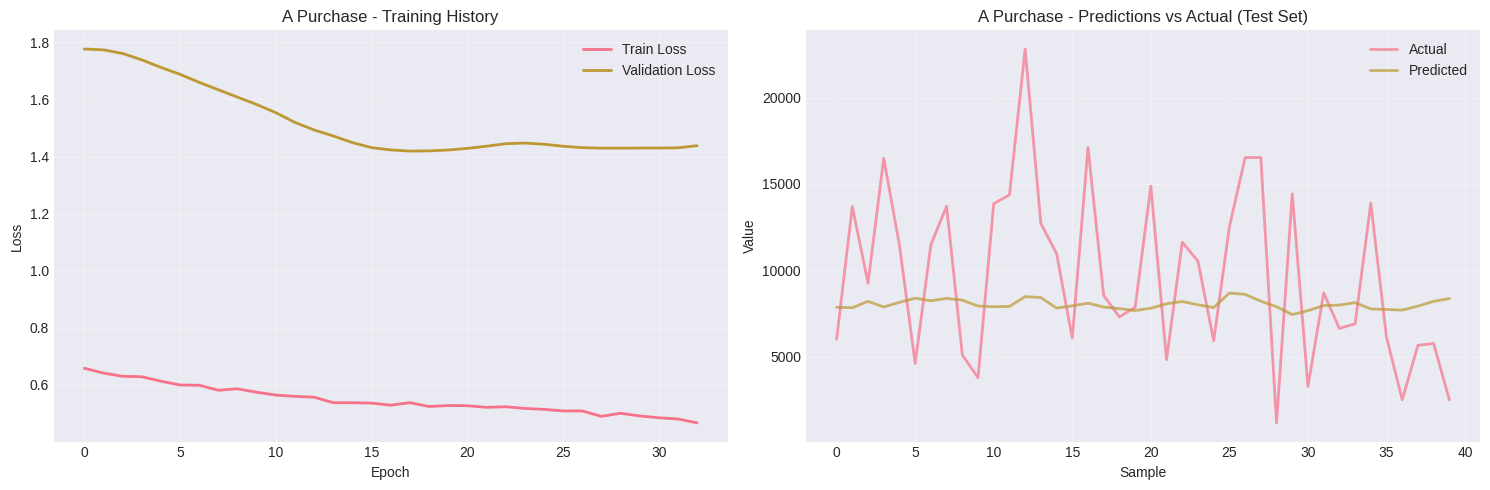

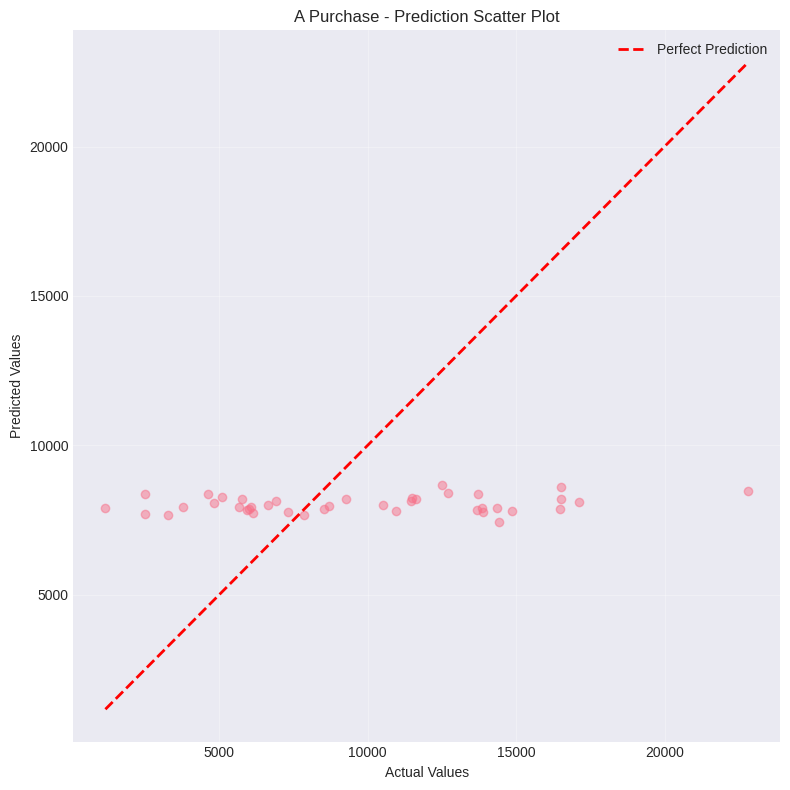


B PURCHASE MODEL

Training B Purchase
Epoch [1/100] - Train Loss: 1.000606, Val Loss: 1.173593
Epoch [10/100] - Train Loss: 0.900541, Val Loss: 1.188910
Epoch [20/100] - Train Loss: 0.793978, Val Loss: 1.137260
Epoch [30/100] - Train Loss: 0.641795, Val Loss: 1.246559

Early stopping triggered at epoch 35
Best validation loss: 1.137260

Training completed!
Final Train Loss: 0.637875
Best Val Loss: 1.137260

B Purchase - Test Set Performance
RMSE: 4887.65
MAE: 3768.97
R² Score: -0.2060
MAPE: 50.96%


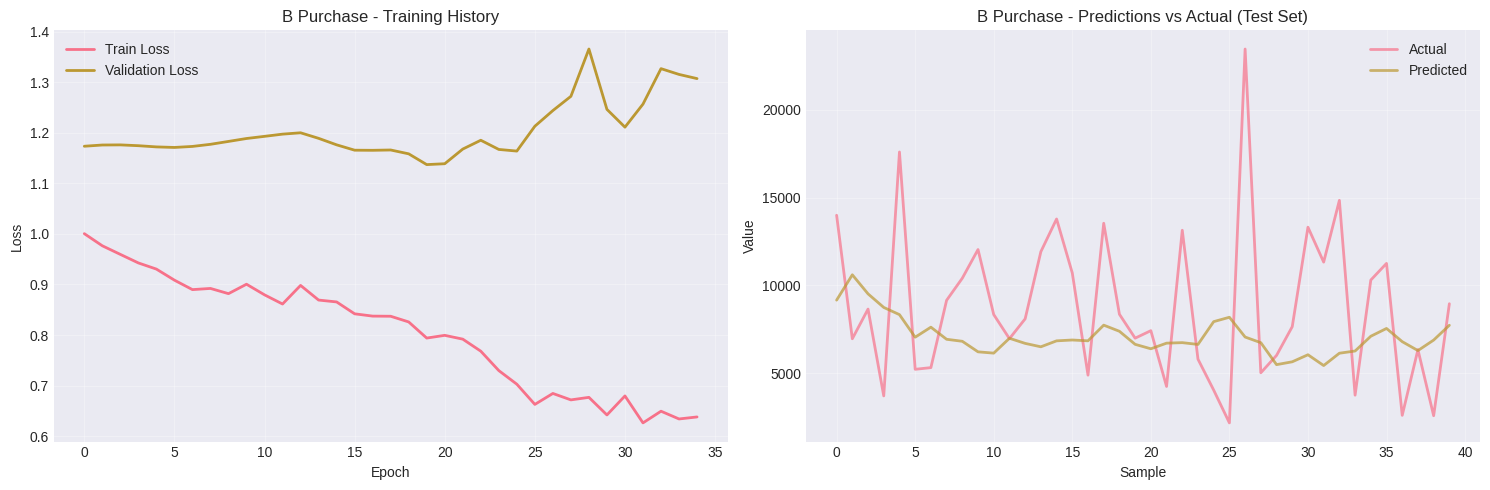

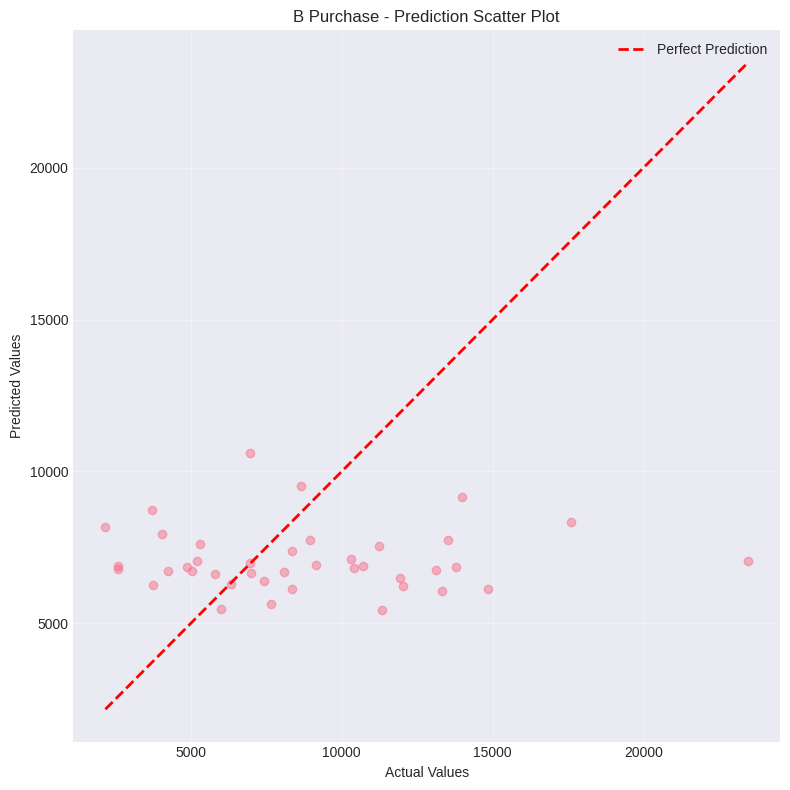


A SALES MODEL

Training A Sales
Epoch [1/100] - Train Loss: 1.009385, Val Loss: 0.648369
Epoch [10/100] - Train Loss: 0.642414, Val Loss: 0.621448
Epoch [20/100] - Train Loss: 0.492650, Val Loss: 0.631512

Early stopping triggered at epoch 23
Best validation loss: 0.616725

Training completed!
Final Train Loss: 0.457683
Best Val Loss: 0.616725

A Sales - Test Set Performance
RMSE: 2612.87
MAE: 2236.37
R² Score: 0.0420
MAPE: 22.84%


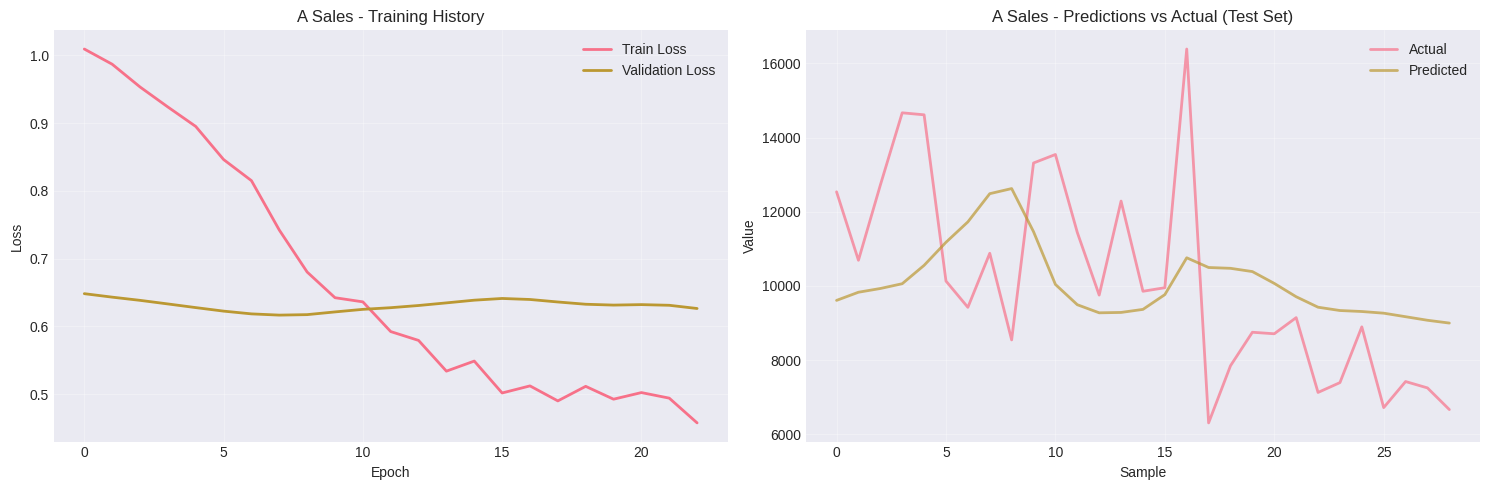

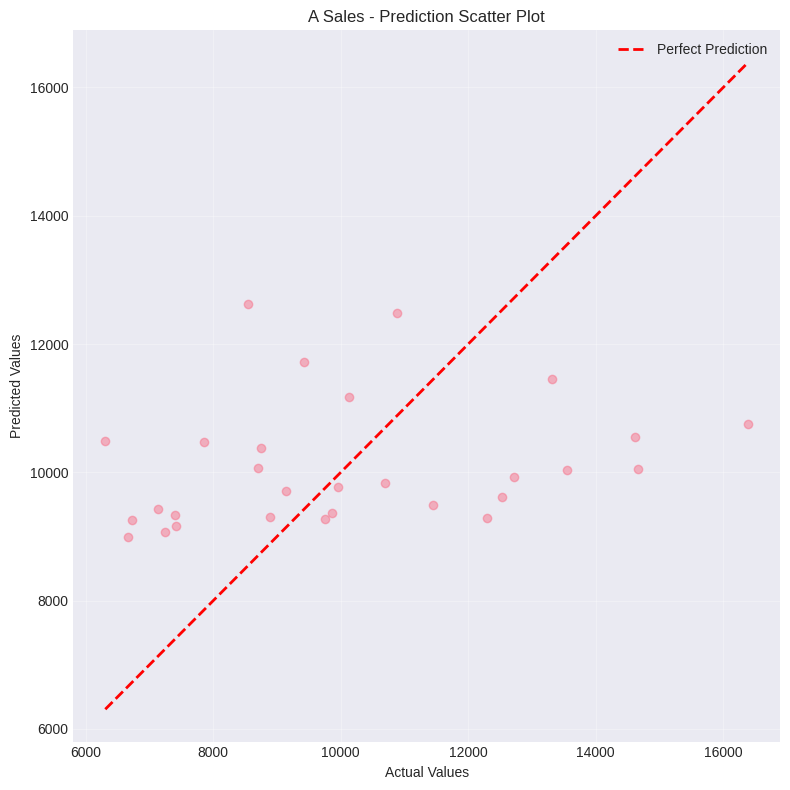


B SALES MODEL

Training B Sales
Epoch [1/100] - Train Loss: 1.596303, Val Loss: 0.462509
Epoch [10/100] - Train Loss: 1.486048, Val Loss: 0.467083

Early stopping triggered at epoch 18
Best validation loss: 0.461900

Training completed!
Final Train Loss: 1.391190
Best Val Loss: 0.461900

B Sales - Test Set Performance
RMSE: 1008.72
MAE: 932.82
R² Score: -0.0409
MAPE: 26.24%


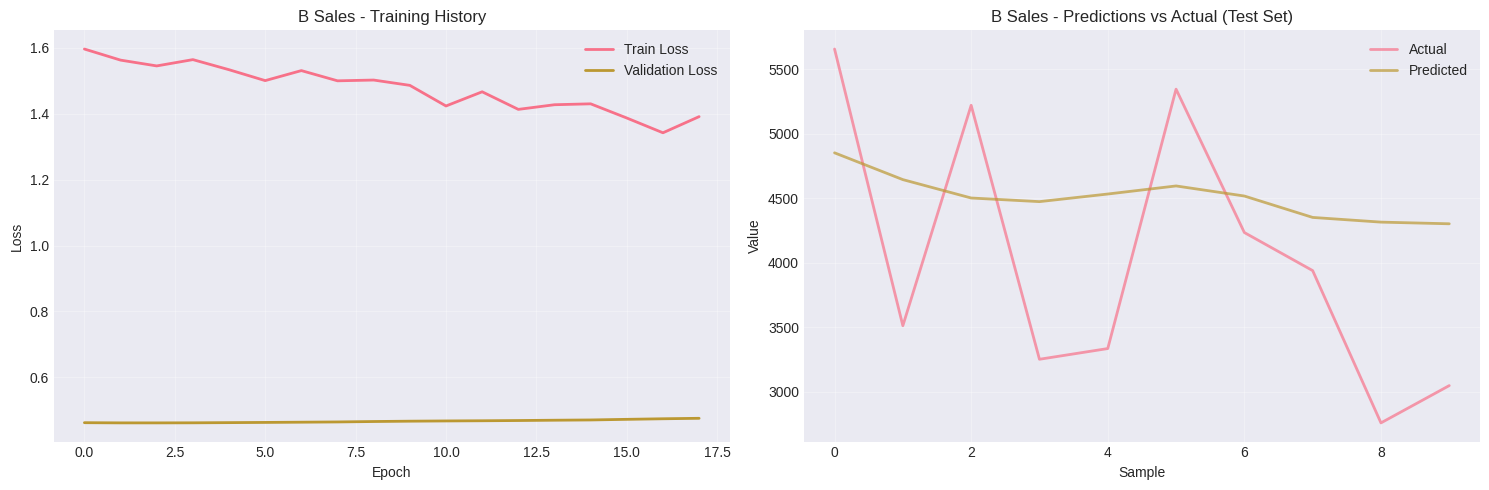

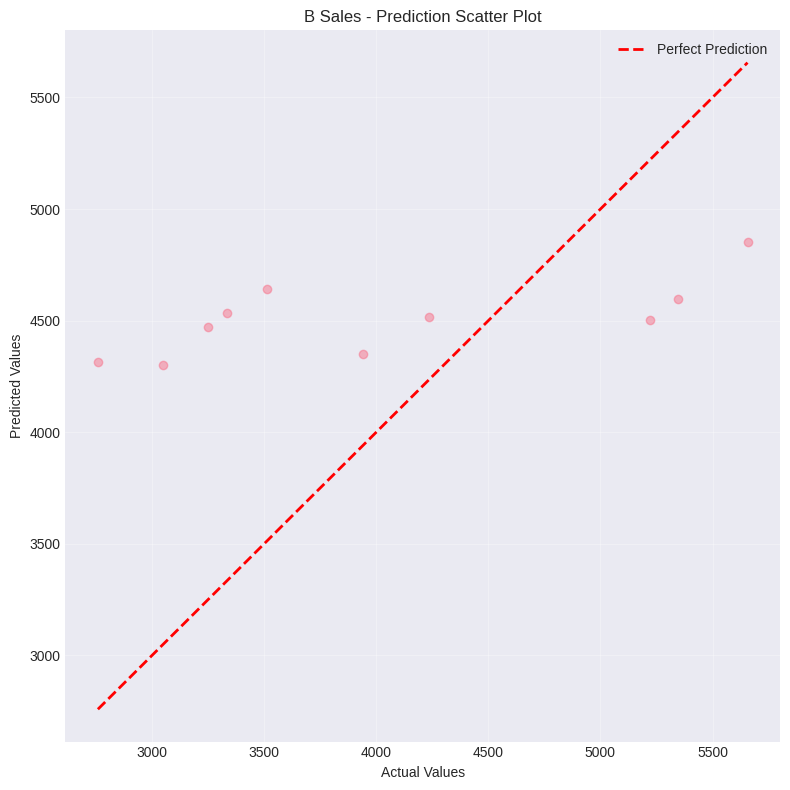


TRAINING COMPLETE - SUMMARY

✅ All models trained successfully!

Trained models available in 'models_dict':
  • a_purchase
  • b_purchase
  • a_sales
  • b_sales

Results available in 'results_dict':
  • a_purchase
  • b_purchase
  • a_sales
  • b_sales

🎯 Next Steps:
  1. Use trained models to predict future weeks (Jan-Mar 2025)
  2. Aggregate weekly predictions to monthly totals
  3. Compare predictions across different scenarios


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("="*80)
print("BUILDING AND TRAINING LSTM MODELS WITH PYTORCH")
print("="*80)

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# ============================================================================
# STEP 1: CREATE PYTORCH DATASET CLASS
# ============================================================================

class TimeSeriesDataset(Dataset):
    """Custom Dataset for time series data"""

    def __init__(self, X, y):
        """
        Args:
            X: numpy array of shape (samples, time_steps, features)
            y: numpy array of shape (samples,)
        """
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ============================================================================
# STEP 2: DEFINE LSTM MODEL ARCHITECTURE
# ============================================================================

class LSTMModel(nn.Module):
    """LSTM model for time series forecasting"""

    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.2):
        """
        Args:
            input_size: Number of input features
            hidden_size: Number of hidden units in LSTM
            num_layers: Number of LSTM layers
            dropout: Dropout rate
        """
        super(LSTMModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (batch_size, seq_length, input_size)
        Returns:
            Output tensor of shape (batch_size, 1)
        """
        # LSTM forward pass
        # output shape: (batch_size, seq_length, hidden_size)
        lstm_out, (h_n, c_n) = self.lstm(x)

        # Take the output from the last time step
        last_output = lstm_out[:, -1, :]  # Shape: (batch_size, hidden_size)

        # Fully connected layers
        out = self.fc1(last_output)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)

        return out.squeeze()  # Shape: (batch_size,)

# ============================================================================
# STEP 3: TRAINING FUNCTION
# ============================================================================

def train_model(model, train_loader, val_loader, criterion, optimizer,
                num_epochs=100, patience=15, device='cpu', model_name="Model"):
    """
    Train the LSTM model with early stopping

    Args:
        model: PyTorch model
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        criterion: Loss function
        optimizer: Optimizer
        num_epochs: Maximum number of epochs
        patience: Early stopping patience
        device: Device to train on
        model_name: Name for logging

    Returns:
        model: Trained model
        train_losses: List of training losses
        val_losses: List of validation losses
    """

    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}")

    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    best_model_state = None

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0

        for batch_X, batch_y in train_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X = batch_X.to(device)
                batch_y = batch_y.to(device)

                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        # Print progress
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] - "
                  f"Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
            best_model_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}")
            print(f"Best validation loss: {best_val_loss:.6f}")
            break

    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    print(f"\nTraining completed!")
    print(f"Final Train Loss: {train_losses[-1]:.6f}")
    print(f"Best Val Loss: {best_val_loss:.6f}")

    return model, train_losses, val_losses

# ============================================================================
# STEP 4: EVALUATION FUNCTION
# ============================================================================

def evaluate_model(model, test_loader, scaler_y, device='cpu', model_name="Model"):
    """
    Evaluate the model on test data

    Args:
        model: Trained PyTorch model
        test_loader: DataLoader for test data
        scaler_y: Scaler for inverse transform
        device: Device to evaluate on
        model_name: Name for logging

    Returns:
        y_true: True values (original scale)
        y_pred: Predicted values (original scale)
    """

    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            outputs = model(batch_X)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(batch_y.cpu().numpy())

    predictions = np.array(predictions)
    actuals = np.array(actuals)

    # Inverse transform to original scale
    y_pred = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_true = scaler_y.inverse_transform(actuals.reshape(-1, 1)).flatten()

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

    print(f"\n{'='*60}")
    print(f"{model_name} - Test Set Performance")
    print(f"{'='*60}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return y_true, y_pred

# ============================================================================
# STEP 5: VISUALIZATION FUNCTION
# ============================================================================

def plot_results(train_losses, val_losses, y_true, y_pred, model_name):
    """Plot training history and predictions"""

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training history
    axes[0].plot(train_losses, label='Train Loss', linewidth=2)
    axes[0].plot(val_losses, label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title(f'{model_name} - Training History')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot predictions vs actual
    axes[1].plot(y_true, label='Actual', linewidth=2, alpha=0.7)
    axes[1].plot(y_pred, label='Predicted', linewidth=2, alpha=0.7)
    axes[1].set_xlabel('Sample')
    axes[1].set_ylabel('Value')
    axes[1].set_title(f'{model_name} - Predictions vs Actual (Test Set)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Scatter plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(y_true, y_pred, alpha=0.5)

    # Perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{model_name} - Prediction Scatter Plot')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ============================================================================
# STEP 6: TRAIN ALL MODELS
# ============================================================================

# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 100
patience = 15
hidden_size = 64
num_layers = 2
dropout = 0.2

print(f"\n{'='*80}")
print("HYPERPARAMETERS")
print(f"{'='*80}")
print(f"Batch Size: {batch_size}")
print(f"Learning Rate: {learning_rate}")
print(f"Max Epochs: {num_epochs}")
print(f"Early Stopping Patience: {patience}")
print(f"Hidden Size: {hidden_size}")
print(f"Number of LSTM Layers: {num_layers}")
print(f"Dropout: {dropout}")

# Dictionary to store all trained models and results
models_dict = {}
results_dict = {}

# ============================================================================
# A PURCHASE MODEL
# ============================================================================

if a_purchase_lstm is not None:
    print(f"\n{'='*80}")
    print("A PURCHASE MODEL")
    print(f"{'='*80}")

    # Create datasets and dataloaders
    train_dataset = TimeSeriesDataset(X_a_purchase_train, y_a_purchase_train)
    test_dataset = TimeSeriesDataset(X_a_purchase_test, y_a_purchase_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    input_size = X_a_purchase_train.shape[2]  # Number of features
    model_a_purchase = LSTMModel(input_size, hidden_size, num_layers, dropout).to(device)

    print(f"\nModel Architecture:")
    print(model_a_purchase)
    print(f"\nTotal Parameters: {sum(p.numel() for p in model_a_purchase.parameters())}")

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_a_purchase.parameters(), lr=learning_rate)

    # Train model
    model_a_purchase, train_losses_a_purchase, val_losses_a_purchase = train_model(
        model_a_purchase, train_loader, test_loader, criterion, optimizer,
        num_epochs, patience, device, "A Purchase"
    )

    # Evaluate model
    y_true_a_purchase, y_pred_a_purchase = evaluate_model(
        model_a_purchase, test_loader, a_purchase_scaler_y, device, "A Purchase"
    )

    # Plot results
    plot_results(train_losses_a_purchase, val_losses_a_purchase,
                 y_true_a_purchase, y_pred_a_purchase, "A Purchase")

    # Store results
    models_dict['a_purchase'] = model_a_purchase
    results_dict['a_purchase'] = {
        'train_losses': train_losses_a_purchase,
        'val_losses': val_losses_a_purchase,
        'y_true': y_true_a_purchase,
        'y_pred': y_pred_a_purchase
    }

# ============================================================================
# B PURCHASE MODEL
# ============================================================================

if b_purchase_lstm is not None:
    print(f"\n{'='*80}")
    print("B PURCHASE MODEL")
    print(f"{'='*80}")

    # Create datasets and dataloaders
    train_dataset = TimeSeriesDataset(X_b_purchase_train, y_b_purchase_train)
    test_dataset = TimeSeriesDataset(X_b_purchase_test, y_b_purchase_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    input_size = X_b_purchase_train.shape[2]
    model_b_purchase = LSTMModel(input_size, hidden_size, num_layers, dropout).to(device)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_b_purchase.parameters(), lr=learning_rate)

    # Train model
    model_b_purchase, train_losses_b_purchase, val_losses_b_purchase = train_model(
        model_b_purchase, train_loader, test_loader, criterion, optimizer,
        num_epochs, patience, device, "B Purchase"
    )

    # Evaluate model
    y_true_b_purchase, y_pred_b_purchase = evaluate_model(
        model_b_purchase, test_loader, b_purchase_scaler_y, device, "B Purchase"
    )

    # Plot results
    plot_results(train_losses_b_purchase, val_losses_b_purchase,
                 y_true_b_purchase, y_pred_b_purchase, "B Purchase")

    # Store results
    models_dict['b_purchase'] = model_b_purchase
    results_dict['b_purchase'] = {
        'train_losses': train_losses_b_purchase,
        'val_losses': val_losses_b_purchase,
        'y_true': y_true_b_purchase,
        'y_pred': y_pred_b_purchase
    }

# ============================================================================
# A SALES MODEL
# ============================================================================

if a_sales_lstm is not None:
    print(f"\n{'='*80}")
    print("A SALES MODEL")
    print(f"{'='*80}")

    # Create datasets and dataloaders
    train_dataset = TimeSeriesDataset(X_a_sales_train, y_a_sales_train)
    test_dataset = TimeSeriesDataset(X_a_sales_test, y_a_sales_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    input_size = X_a_sales_train.shape[2]
    model_a_sales = LSTMModel(input_size, hidden_size, num_layers, dropout).to(device)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_a_sales.parameters(), lr=learning_rate)

    # Train model
    model_a_sales, train_losses_a_sales, val_losses_a_sales = train_model(
        model_a_sales, train_loader, test_loader, criterion, optimizer,
        num_epochs, patience, device, "A Sales"
    )

    # Evaluate model
    y_true_a_sales, y_pred_a_sales = evaluate_model(
        model_a_sales, test_loader, a_sales_scaler_y, device, "A Sales"
    )

    # Plot results
    plot_results(train_losses_a_sales, val_losses_a_sales,
                 y_true_a_sales, y_pred_a_sales, "A Sales")

    # Store results
    models_dict['a_sales'] = model_a_sales
    results_dict['a_sales'] = {
        'train_losses': train_losses_a_sales,
        'val_losses': val_losses_a_sales,
        'y_true': y_true_a_sales,
        'y_pred': y_pred_a_sales
    }

# ============================================================================
# B SALES MODEL
# ============================================================================

if b_sales_lstm is not None:
    print(f"\n{'='*80}")
    print("B SALES MODEL")
    print(f"{'='*80}")

    # Create datasets and dataloaders
    train_dataset = TimeSeriesDataset(X_b_sales_train, y_b_sales_train)
    test_dataset = TimeSeriesDataset(X_b_sales_test, y_b_sales_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    input_size = X_b_sales_train.shape[2]
    model_b_sales = LSTMModel(input_size, hidden_size, num_layers, dropout).to(device)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_b_sales.parameters(), lr=learning_rate)

    # Train model
    model_b_sales, train_losses_b_sales, val_losses_b_sales = train_model(
        model_b_sales, train_loader, test_loader, criterion, optimizer,
        num_epochs, patience, device, "B Sales"
    )

    # Evaluate model
    y_true_b_sales, y_pred_b_sales = evaluate_model(
        model_b_sales, test_loader, b_sales_scaler_y, device, "B Sales"
    )

    # Plot results
    plot_results(train_losses_b_sales, val_losses_b_sales,
                 y_true_b_sales, y_pred_b_sales, "B Sales")

    # Store results
    models_dict['b_sales'] = model_b_sales
    results_dict['b_sales'] = {
        'train_losses': train_losses_b_sales,
        'val_losses': val_losses_b_sales,
        'y_true': y_true_b_sales,
        'y_pred': y_pred_b_sales
    }

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("TRAINING COMPLETE - SUMMARY")
print("="*80)

print("\n✅ All models trained successfully!")
print("\nTrained models available in 'models_dict':")
for key in models_dict.keys():
    print(f"  • {key}")

print("\nResults available in 'results_dict':")
for key in results_dict.keys():
    print(f"  • {key}")

print("\n🎯 Next Steps:")
print("  1. Use trained models to predict future weeks (Jan-Mar 2025)")
print("  2. Aggregate weekly predictions to monthly totals")
print("  3. Compare predictions across different scenarios")

print("="*80)